In [59]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget

from sklearn import preprocessing
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [60]:
pd.set_option('display.max_columns', 17000)
pd.set_option('display.max_row', 17000)

In [61]:
df = pd.read_csv("Train.csv", sep=",", index_col='Square_ID')

In [62]:
train = df.drop(['precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
 'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
 'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
 'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
 'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
 'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
 'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
 'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
 'precip 2019-05-12 - 2019-05-19'], axis=1)

In [63]:
X_fulltest = df.drop(['precip 2014-11-16 - 2014-11-23',
 'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
 'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
 'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
 'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
 'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
 'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
 'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
 'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15'], axis=1)

Feature generating

In [64]:
Train_stat = train.drop (['X', 'Y', 'target_2015', 'elevation', 'LC_Type1_mode'                  
                         ], axis=1)

In [65]:
Train_feature = Train_stat.copy()

автогенерация

In [66]:
Train_feature.reset_index('Square_ID', inplace=True)

In [67]:
Train_feature1 = Train_feature.replace('', np.nan).set_index('Square_ID').stack().reset_index(name='value').drop('level_1',1)

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.metrics import mean_absolute_error
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features
import tsfresh
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns

In [69]:
from tsfresh import extract_relevant_features
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters, MinimalFCParameters, EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns
settings_comprehensive = EfficientFCParameters()

#train_time_series = Train_feature1['Square_ID']
#augmenter = RelevantFeatureAugmenter()
#augmenter.set_timeseries_container(train_time_series)
#X =augmenter.fit(Train_feature1, y = train['target_2015'] )
#X = extract_relevant_features(Train_feature1, train['target_2015'], column_id='Square_ID', column_value='value'
                              #default_fc_parameters=settings_comprehensive
                         #    )

X = extract_features(Train_feature1, column_id='Square_ID', column_value='value', n_jobs=8, 
                                      default_fc_parameters=EfficientFCParameters())



Feature Extraction: 100%|██████████| 40/40 [02:30<00:00,  3.76s/it]


In [70]:
impute(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16466 entries, 4e3c3896-14ce-11ea-bce5-f49634744a41 to 4e6f5e01-14ce-11ea-bce5-f49634744a41
Columns: 748 entries, value__abs_energy to value__variance_larger_than_standard_deviation
dtypes: float64(748)
memory usage: 94.1+ MB


In [71]:
smaller = select_features(X, train['target_2015'], fdr_level = .0000000000000000000000005, ml_task = 'regression')

In [72]:
smaller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16466 entries, 4e3c3896-14ce-11ea-bce5-f49634744a41 to 4e6f5e01-14ce-11ea-bce5-f49634744a41
Columns: 115 entries, value__autocorrelation__lag_4 to value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2
dtypes: float64(115)
memory usage: 14.6+ MB


In [73]:
smaller_fc_parameters = tsfresh.feature_extraction.settings.from_columns(smaller)

In [74]:
trainfull1 = train.merge(smaller, how='left', left_index=True, right_index=True)

In [75]:
trainfull1  = trainfull1.drop(['precip 2014-11-16 - 2014-11-23',
 'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
 'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
 'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
 'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
 'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
 'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
 'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
 'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15'], axis=1)

Geofeaturing

In [76]:

#xy_scaler = preprocessing.StandardScaler () xy scaler.fit (trainfull1 [["X", "Y"]])
#trainfull1 [["X", "Y"]] = xy_scaler.transform (trainfull1 [["X", "Y"]])

trainfull1['arctan2'] = np.arctan2(trainfull1['Y'], trainfull1['X'])
trainfull1['radial_r'] = np.sqrt( np.power(trainfull1['Y'],2) + np.power(trainfull1['X'],2))

trainfull1['rot45X'] = .707* trainfull1['Y'] + .707* trainfull1['X'] 
trainfull1['rot45Y'] = .707* trainfull1['Y'] - .707* trainfull1['X']

trainfull1['rot30X'] = (1.732/2)* trainfull1['X'] + (1./2)* trainfull1['Y'] 
trainfull1['rot30Y'] = (1.732/2)* trainfull1['Y'] - (1./2)* trainfull1['X']

trainfull1['rot60X'] = (1./2)* trainfull1['X'] + (1.732/2)* trainfull1['Y'] 
trainfull1['rot60Y'] = (1./2)* trainfull1['Y'] - (1.732/2)* trainfull1['X']




#trainfull1['rot_45_x'] = (0.707 * trainfull1['X']) + (0.707 * trainfull1['Y'])
#trainfull1['rot_45_y'] = (0.707 * trainfull1['Y']) + (0.707 * trainfull1['X'])
#trainfull1['rot_30_x'] = (0.866 * trainfull1['X']) + (0.5 * trainfull1['Y'])
#trainfull1['rot_30_y'] = (0.866 * trainfull1['Y']) + (0.5 * trainfull1['X'])

In [77]:
from sklearn.decomposition import PCA
data = trainfull1
coordinates = data[['X','Y']].values
pca_obj = PCA().fit(coordinates)
trainfull1['pca_x'] = pca_obj.transform(data[['X', 'Y']])[:,0]
trainfull1['pca_y'] = pca_obj.transform(data[['X','Y']])[:,1]

In [78]:
#base case Balantayer
from haversine import haversine
city_center_coordinates = (35.003815, -15.788289)

trainfull1['dist_center'] = trainfull1.apply(lambda row: haversine((row['X'], row['Y']), city_center_coordinates), axis=1)

In [79]:
import pygeohash as gh
# создаем переменную - геохеш
trainfull1['geohash'] = trainfull1.apply(lambda x: gh.encode(x['X'], x['Y'], precision=6), axis=1) #лучший результат с 6 знаками


In [80]:
geohash_center = gh.encode(35.003815, -15.788289, precision=6)

# преобразовываем геохеш "центра" во множество
geohash_center_set = set(geohash_center)
# создаем переменную - количество совпадающих символов
# (учитываем повторяющиеся символы)
trainfull1['match'] = trainfull1['geohash'].apply(lambda x: sum([let1 == let2 for let1, let2 in zip(geohash_center, x)]))
# создаем переменную - количество совпадающих символов
# (не учитываем повторяющиеся символы)
trainfull1['match2'] = trainfull1['geohash'].apply(lambda x: len(set(x) & geohash_center_set))

In [81]:
trainfull1['geohash + LC_Type1_mode'] = trainfull1.apply(
lambda x: f"{x['geohash']} + {x['LC_Type1_mode']}",
axis=1)

# Обучим на всем train сете предскажем на тесте и сформируем посылку на Zindi

In [82]:
Test_stat = X_fulltest.drop (['X', 'Y', 'target_2015', 'elevation', 'LC_Type1_mode', 
                              #'elev_diff_mean'
                             ], axis=1)

In [83]:
Test_feature = Test_stat.copy()

autogeneration

In [84]:
Test_feature.reset_index('Square_ID', inplace=True)
Test_feature1 = Test_feature.replace('', np.nan).set_index('Square_ID').stack().reset_index(name='value').drop('level_1',1)

In [85]:


X_t = extract_features(Test_feature1, column_id='Square_ID', column_value='value', n_jobs=8, 
                              default_fc_parameters=smaller_fc_parameters['value'] )
#X_selected = selector.transform(Test_feature1)

X_testsubm1 = X_fulltest.merge(X_t, how='left', left_index=True, right_index=True)

X_testsubm1  = X_testsubm1.drop(['precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
 'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
 'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
 'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
 'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
 'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
 'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
 'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
 'precip 2019-05-12 - 2019-05-19'], axis=1)




Feature Extraction: 100%|██████████| 40/40 [01:01<00:00,  1.53s/it]


In [86]:
#xy_scaler = preprocessing.StandardScaler () xy scaler.fit (trainfull1 [["X", "Y"]])
#trainfull1 [["X", "Y"]] = xy_scaler.transform (trainfull1 [["X", "Y"]])

X_testsubm1['arctan2'] = np.arctan2(X_testsubm1['Y'], X_testsubm1['X'])
X_testsubm1['radial_r'] = np.sqrt( np.power(X_testsubm1['Y'],2) + np.power(X_testsubm1['X'],2))

X_testsubm1['rot45X'] = .707* X_testsubm1['Y'] + .707* X_testsubm1['X'] 
X_testsubm1['rot45Y'] = .707* X_testsubm1['Y'] - .707* X_testsubm1['X']

X_testsubm1['rot30X'] = (1.732/2)* X_testsubm1['X'] + (1./2)* X_testsubm1['Y'] 
X_testsubm1['rot30Y'] = (1.732/2)* X_testsubm1['Y'] - (1./2)* X_testsubm1['X']

X_testsubm1['rot60X'] = (1./2)* X_testsubm1['X'] + (1.732/2)* X_testsubm1['Y'] 
X_testsubm1['rot60Y'] = (1./2)* X_testsubm1['Y'] - (1.732/2)* X_testsubm1['X']

#X_testsubm1['rot_45_x'] = (0.707 * X_testsubm1['X']) + (0.707 * X_testsubm1['Y'])
#X_testsubm1['rot_45_y'] = (0.707 * X_testsubm1['Y']) + (0.707 * X_testsubm1['X'])
#X_testsubm1['rot_30_x'] = (0.866 * X_testsubm1['X']) + (0.5 * X_testsubm1['Y'])
#X_testsubm1['rot_30_y'] = (0.866 * X_testsubm1['Y']) + (0.5 * X_testsubm1['X'])

In [87]:
from sklearn.decomposition import PCA
data = X_testsubm1
coordinates = data[['X','Y']].values
pca_obj = PCA().fit(coordinates)
X_testsubm1['pca_x'] = pca_obj.transform(data[['X', 'Y']])[:,0]
X_testsubm1['pca_y'] = pca_obj.transform(data[['X','Y']])[:,1]

In [88]:
# базовый вариант
from haversine import haversine
city_center_coordinates = (35.003815, -15.788289)

X_testsubm1['dist_center'] = X_testsubm1.apply(lambda row: haversine((row['X'], row['Y']), city_center_coordinates), axis=1)


In [89]:
import pygeohash as gh
# создаем переменную - геохеш
X_testsubm1['geohash'] = X_testsubm1.apply(lambda x: gh.encode(x['X'], x['Y'], precision=6), axis=1) #лучший результат с 6 знаками
# выводим первые 5 наблюдений

In [90]:
geohash_center = gh.encode(35.003815, -15.788289, precision=6)

# преобразовываем геохеш "центра" во множество
geohash_center_set = set(geohash_center)
# создаем переменную - количество совпадающих символов
# (учитываем повторяющиеся символы)
X_testsubm1['match'] = X_testsubm1['geohash'].apply(lambda x: sum([let1 == let2 for let1, let2 in zip(geohash_center, x)]))
# создаем переменную - количество совпадающих символов
# (не учитываем повторяющиеся символы)
X_testsubm1['match2'] = X_testsubm1['geohash'].apply(lambda x: len(set(x) & geohash_center_set))

In [91]:
# пишем функцию, которая создает взаимодействие
# в результате конъюнкции переменных
X_testsubm1['geohash + LC_Type1_mode'] = X_testsubm1.apply(
lambda x: f"{x['geohash']} + {x['LC_Type1_mode']}",
axis=1)

In [92]:
#remove outliers
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]

trainfull1 = outliers_IQR(trainfull1, 'value__c3__lag_3')
trainfull1 = outliers_IQR(trainfull1, 'value__c3__lag_2')
trainfull1 = outliers_IQR(trainfull1, 'value__c3__lag_1')
trainfull1 = outliers_IQR(trainfull1, 'value__time_reversal_asymmetry_statistic__lag_1')
trainfull1 = outliers_IQR(trainfull1, 'value__time_reversal_asymmetry_statistic__lag_3')
trainfull1 = outliers_IQR(trainfull1, 'value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8')

In [93]:
trainfull1 = outliers_IQR(trainfull1, 'value__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"slope"')
trainfull1 = outliers_IQR(trainfull1, 'value__fft_coefficient__coeff_8__attr_"angle"')
trainfull1 = outliers_IQR(trainfull1, 'value__max_langevin_fixed_point__m_3__r_30')

In [94]:
trainfull1.shape

(10449, 135)

In [95]:
y_trainfull = trainfull1['target_2015'].copy()

In [96]:
X_trainfullsubm = trainfull1.drop('target_2015', axis=1)
X_testfullsubm = X_testsubm1.copy()

In [97]:
X_testfullsubm = X_testfullsubm.drop('target_2015', axis=1)

In [98]:
# импортируем класс TargetEncoder из пакета category_encoders
from category_encoders import TargetEncoder
# создаем экземпляр класса TargetEncoder (модель)
# для обучающей выборки
target_enc = TargetEncoder(cols=['geohash', 
                                'geohash + LC_Type1_mode'
                                
                                ], smoothing=3, min_samples_leaf=1)
# обучаем модель, т.е. создаем таблицу, в соответствии с которой
# категориям предиктора в обучающей выборке будут сопоставлены
# сглаженные средние значения зависимой переменной
target_enc.fit(X_trainfullsubm, y_trainfull)
# применяем модель к обучающей выборке, категории предиктора
# в обучающей выборке заменяются на сглаженные средние значения зависимой
# переменной
target_encoded_train = target_enc.transform(X_trainfullsubm, y_trainfull)

# создаем экземпляр класса TargetEncoder (модель)
# для тестовой выборки
target_enc_test = TargetEncoder(cols=['geohash',
                                     'geohash + LC_Type1_mode'
                                      
                                     ], smoothing=False)
# обучаем модель, т.е. создаем таблицу, в соответствии с которой
# категориям предиктора в тестовой выборке будут сопоставлены
# обычные средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
target_enc_test.fit(X_trainfullsubm, y_trainfull)
# применяем модель к тестовой выборке,
# категории предиктора в тестовой выборке заменяются на обычные
# средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
target_encoded_test = target_enc_test.transform(X_testfullsubm)

In [99]:
target_encoded_train.shape

(10449, 134)

In [100]:
target_encoded_test.shape


(16466, 134)

# Modeling

In [55]:
# Самый лучший результат
clf = xgb.XGBRegressor(
    n_estimators=3500, #3500
    max_depth=13, #13
    #min_child_weight = 10,
    learning_rate=0.004, #eta = 0.005,
    subsample=0.9, #0.9
    colsample_bytree=0.4,
    random_state=2019,
    objective='reg:linear',
    tree_method='gpu_hist'  #обучимся на видюшке - скорость огонь минуты против часов
)


In [334]:
# єксперимент с гипероптом
clf = xgb.XGBRegressor(
    n_estimators=9000, #3700
    max_depth=12, #16
    learning_rate=0.01, #eta = 0.005,
    subsample=0.8500000000000001,
    colsample_bytree=0.45,
    #gamma = 0.75,
    #min_child_weight = 3.0,
    #reg_lambda = 1.4000000000000001,
    random_state=2019,
    objective='reg:linear',
    #alpha = 2.0,
    tree_method='gpu_hist'  #обучимся на видюшке - скорость огонь минуты против часов
)


In [56]:
%time clf.fit(target_encoded_train, y_trainfull)

[08:18:23] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 19s, sys: 13.6 s, total: 2min 32s
Wall time: 2min 32s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.004, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=3500, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=2019, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='gpu_hist', validate_parameters=False, verbosity=None)

In [341]:
import lightgbm as lgb  
from lightgbm import LGBMClassifier
import pickle  
params = {'objective': 'regression', 
                                       'num_leaves': 7, 
                                       'learning_rate': 0.01, 
                                       'n_estimators' : 15000,
                                       'max_bin' : 200, 
                                       'bagging_fraction': 0.75,
                                       'bagging_freq' : 5, 
                                       'bagging_seed' : 7,
                                       'feature_fraction' : 0.2, # 'was 0.2'
                                       'feature_fraction_seed' : 7,
                                       'verbose' : -1,
         }

In [342]:
trn_data = lgb.Dataset(target_encoded_train, label=y_trainfull)

#lgb_eval = lgb.Dataset(X_test, y_test, reference=trn_data) 
  
gbm = lgb.train(params, trn_data,  num_boost_round=3000) 

In [101]:
import catboost
from sklearn.model_selection import KFold
from catboost import Pool, CatBoostClassifier, CatBoostRegressor
from catboost import MetricVisualizer
import matplotlib
import seaborn as sns
%matplotlib inline #для статики
%matplotlib widget #для динамики


UsageError: unrecognized arguments: #для статики


In [102]:


#Best!!!
model = CatBoostRegressor(
    eval_metric='RMSE',
    iterations=9200,  #9150 best
    learning_rate=0.004, 
    depth = 12, 
    random_seed=42,
    loss_function='RMSE',
    #random_strength= 0.97,
    #bagging_temperature=0.97,
    l2_leaf_reg= 3.6, 
    use_best_model = True, 
    #logging_level='Silent'
    task_type="GPU",
    #bootstrap_type = 'Poisson'
)

In [103]:
model.fit(
      target_encoded_train, y_trainfull,
      eval_set=(target_encoded_train, y_trainfull), 
      #cat_features=categorical_features_indices,
      use_best_model=True,
      plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2029277	test: 0.2029277	best: 0.2029277 (0)	total: 285ms	remaining: 43m 46s
1:	learn: 0.2024358	test: 0.2024358	best: 0.2024358 (1)	total: 505ms	remaining: 38m 42s
2:	learn: 0.2019777	test: 0.2019777	best: 0.2019777 (2)	total: 595ms	remaining: 30m 25s
3:	learn: 0.2015384	test: 0.2015384	best: 0.2015384 (3)	total: 629ms	remaining: 24m 6s
4:	learn: 0.2010440	test: 0.2010441	best: 0.2010441 (4)	total: 791ms	remaining: 24m 13s
5:	learn: 0.2005698	test: 0.2005698	best: 0.2005698 (5)	total: 1.01s	remaining: 25m 46s
6:	learn: 0.2000706	test: 0.2000706	best: 0.2000706 (6)	total: 1.23s	remaining: 26m 51s
7:	learn: 0.1996204	test: 0.1996204	best: 0.1996204 (7)	total: 1.45s	remaining: 27m 42s
8:	learn: 0.1991731	test: 0.1991731	best: 0.1991731 (8)	total: 1.47s	remaining: 24m 56s
9:	learn: 0.1986684	test: 0.1986684	best: 0.1986684 (9)	total: 1.69s	remaining: 25m 50s
10:	learn: 0.1982187	test: 0.1982187	best: 0.1982187 (10)	total: 1.91s	remaining: 26m 32s
11:	learn: 0.1977416	test: 0.19

92:	learn: 0.1666239	test: 0.1666239	best: 0.1666239 (92)	total: 15.3s	remaining: 25m 2s
93:	learn: 0.1663048	test: 0.1663048	best: 0.1663048 (93)	total: 15.6s	remaining: 25m 7s
94:	learn: 0.1660096	test: 0.1660096	best: 0.1660096 (94)	total: 15.6s	remaining: 24m 54s
95:	learn: 0.1657222	test: 0.1657222	best: 0.1657222 (95)	total: 15.7s	remaining: 24m 53s
96:	learn: 0.1654513	test: 0.1654512	best: 0.1654512 (96)	total: 15.8s	remaining: 24m 39s
97:	learn: 0.1651720	test: 0.1651721	best: 0.1651721 (97)	total: 15.8s	remaining: 24m 27s
98:	learn: 0.1649048	test: 0.1649048	best: 0.1649048 (98)	total: 15.8s	remaining: 24m 14s
99:	learn: 0.1646087	test: 0.1646087	best: 0.1646087 (99)	total: 16s	remaining: 24m 19s
100:	learn: 0.1643130	test: 0.1643130	best: 0.1643130 (100)	total: 16.1s	remaining: 24m 13s
101:	learn: 0.1640327	test: 0.1640327	best: 0.1640327 (101)	total: 16.3s	remaining: 24m 13s
102:	learn: 0.1637432	test: 0.1637432	best: 0.1637432 (102)	total: 16.4s	remaining: 24m 12s
103:	lea

183:	learn: 0.1441127	test: 0.1441127	best: 0.1441127 (183)	total: 29.7s	remaining: 24m 17s
184:	learn: 0.1438824	test: 0.1438825	best: 0.1438825 (184)	total: 30s	remaining: 24m 20s
185:	learn: 0.1436530	test: 0.1436530	best: 0.1436530 (185)	total: 30.2s	remaining: 24m 22s
186:	learn: 0.1434888	test: 0.1434888	best: 0.1434888 (186)	total: 30.2s	remaining: 24m 15s
187:	learn: 0.1433042	test: 0.1433042	best: 0.1433042 (187)	total: 30.2s	remaining: 24m 9s
188:	learn: 0.1431126	test: 0.1431126	best: 0.1431126 (188)	total: 30.5s	remaining: 24m 12s
189:	learn: 0.1429523	test: 0.1429523	best: 0.1429523 (189)	total: 30.5s	remaining: 24m 5s
190:	learn: 0.1427462	test: 0.1427462	best: 0.1427462 (190)	total: 30.7s	remaining: 24m 8s
191:	learn: 0.1425322	test: 0.1425322	best: 0.1425322 (191)	total: 30.9s	remaining: 24m 10s
192:	learn: 0.1423642	test: 0.1423642	best: 0.1423642 (192)	total: 31s	remaining: 24m 5s
193:	learn: 0.1422075	test: 0.1422075	best: 0.1422075 (193)	total: 31s	remaining: 23m 58

275:	learn: 0.1291439	test: 0.1291439	best: 0.1291439 (275)	total: 44.9s	remaining: 24m 11s
276:	learn: 0.1290229	test: 0.1290229	best: 0.1290229 (276)	total: 45.1s	remaining: 24m 13s
277:	learn: 0.1289163	test: 0.1289163	best: 0.1289163 (277)	total: 45.1s	remaining: 24m 8s
278:	learn: 0.1288130	test: 0.1288130	best: 0.1288130 (278)	total: 45.3s	remaining: 24m 8s
279:	learn: 0.1287115	test: 0.1287115	best: 0.1287115 (279)	total: 45.3s	remaining: 24m 3s
280:	learn: 0.1285948	test: 0.1285948	best: 0.1285948 (280)	total: 45.5s	remaining: 24m 5s
281:	learn: 0.1284396	test: 0.1284396	best: 0.1284396 (281)	total: 45.8s	remaining: 24m 7s
282:	learn: 0.1283427	test: 0.1283427	best: 0.1283427 (282)	total: 45.8s	remaining: 24m 3s
283:	learn: 0.1281806	test: 0.1281806	best: 0.1281806 (283)	total: 46s	remaining: 24m 5s
284:	learn: 0.1280762	test: 0.1280762	best: 0.1280762 (284)	total: 46.3s	remaining: 24m 7s
285:	learn: 0.1279415	test: 0.1279415	best: 0.1279415 (285)	total: 46.5s	remaining: 24m 9s

365:	learn: 0.1196945	test: 0.1196945	best: 0.1196945 (365)	total: 1m	remaining: 24m 20s
366:	learn: 0.1196285	test: 0.1196285	best: 0.1196285 (366)	total: 1m	remaining: 24m 21s
367:	learn: 0.1195411	test: 0.1195411	best: 0.1195411 (367)	total: 1m	remaining: 24m 22s
368:	learn: 0.1194419	test: 0.1194419	best: 0.1194419 (368)	total: 1m 1s	remaining: 24m 23s
369:	learn: 0.1193782	test: 0.1193782	best: 0.1193782 (369)	total: 1m 1s	remaining: 24m 25s
370:	learn: 0.1192971	test: 0.1192971	best: 0.1192971 (370)	total: 1m 1s	remaining: 24m 26s
371:	learn: 0.1192147	test: 0.1192147	best: 0.1192147 (371)	total: 1m 1s	remaining: 24m 27s
372:	learn: 0.1191263	test: 0.1191263	best: 0.1191263 (372)	total: 1m 2s	remaining: 24m 28s
373:	learn: 0.1190350	test: 0.1190350	best: 0.1190350 (373)	total: 1m 2s	remaining: 24m 29s
374:	learn: 0.1189599	test: 0.1189599	best: 0.1189599 (374)	total: 1m 2s	remaining: 24m 31s
375:	learn: 0.1188528	test: 0.1188528	best: 0.1188528 (375)	total: 1m 2s	remaining: 24m 3

454:	learn: 0.1134936	test: 0.1134936	best: 0.1134936 (454)	total: 1m 16s	remaining: 24m 30s
455:	learn: 0.1134194	test: 0.1134194	best: 0.1134194 (455)	total: 1m 16s	remaining: 24m 31s
456:	learn: 0.1133615	test: 0.1133615	best: 0.1133615 (456)	total: 1m 16s	remaining: 24m 32s
457:	learn: 0.1133030	test: 0.1133030	best: 0.1133030 (457)	total: 1m 17s	remaining: 24m 32s
458:	learn: 0.1132562	test: 0.1132562	best: 0.1132562 (458)	total: 1m 17s	remaining: 24m 33s
459:	learn: 0.1132141	test: 0.1132141	best: 0.1132141 (459)	total: 1m 17s	remaining: 24m 30s
460:	learn: 0.1131497	test: 0.1131497	best: 0.1131497 (460)	total: 1m 17s	remaining: 24m 31s
461:	learn: 0.1131075	test: 0.1131075	best: 0.1131075 (461)	total: 1m 17s	remaining: 24m 32s
462:	learn: 0.1130606	test: 0.1130606	best: 0.1130606 (462)	total: 1m 17s	remaining: 24m 31s
463:	learn: 0.1129958	test: 0.1129958	best: 0.1129958 (463)	total: 1m 17s	remaining: 24m 28s
464:	learn: 0.1129534	test: 0.1129534	best: 0.1129534 (464)	total: 1m 

543:	learn: 0.1086549	test: 0.1086549	best: 0.1086549 (543)	total: 1m 33s	remaining: 24m 54s
544:	learn: 0.1086297	test: 0.1086297	best: 0.1086297 (544)	total: 1m 33s	remaining: 24m 51s
545:	learn: 0.1085698	test: 0.1085698	best: 0.1085698 (545)	total: 1m 34s	remaining: 24m 52s
546:	learn: 0.1085242	test: 0.1085242	best: 0.1085242 (546)	total: 1m 34s	remaining: 24m 53s
547:	learn: 0.1084641	test: 0.1084641	best: 0.1084641 (547)	total: 1m 34s	remaining: 24m 53s
548:	learn: 0.1084037	test: 0.1084037	best: 0.1084037 (548)	total: 1m 34s	remaining: 24m 54s
549:	learn: 0.1083700	test: 0.1083700	best: 0.1083700 (549)	total: 1m 35s	remaining: 24m 55s
550:	learn: 0.1083447	test: 0.1083447	best: 0.1083447 (550)	total: 1m 35s	remaining: 24m 55s
551:	learn: 0.1083232	test: 0.1083232	best: 0.1083232 (551)	total: 1m 35s	remaining: 24m 53s
552:	learn: 0.1082882	test: 0.1082882	best: 0.1082882 (552)	total: 1m 35s	remaining: 24m 54s
553:	learn: 0.1082258	test: 0.1082258	best: 0.1082258 (553)	total: 1m 

632:	learn: 0.1050639	test: 0.1050639	best: 0.1050639 (632)	total: 1m 51s	remaining: 25m 6s
633:	learn: 0.1050355	test: 0.1050355	best: 0.1050355 (633)	total: 1m 51s	remaining: 25m 7s
634:	learn: 0.1049791	test: 0.1049791	best: 0.1049791 (634)	total: 1m 51s	remaining: 25m 7s
635:	learn: 0.1049615	test: 0.1049615	best: 0.1049615 (635)	total: 1m 52s	remaining: 25m 8s
636:	learn: 0.1049123	test: 0.1049123	best: 0.1049123 (636)	total: 1m 52s	remaining: 25m 8s
637:	learn: 0.1048861	test: 0.1048861	best: 0.1048861 (637)	total: 1m 52s	remaining: 25m 9s
638:	learn: 0.1048654	test: 0.1048654	best: 0.1048654 (638)	total: 1m 52s	remaining: 25m 9s
639:	learn: 0.1048324	test: 0.1048324	best: 0.1048324 (639)	total: 1m 52s	remaining: 25m 10s
640:	learn: 0.1047879	test: 0.1047879	best: 0.1047879 (640)	total: 1m 53s	remaining: 25m 10s
641:	learn: 0.1047458	test: 0.1047458	best: 0.1047458 (641)	total: 1m 53s	remaining: 25m 11s
642:	learn: 0.1047295	test: 0.1047295	best: 0.1047295 (642)	total: 1m 53s	rem

722:	learn: 0.1024373	test: 0.1024373	best: 0.1024373 (722)	total: 2m 8s	remaining: 25m 11s
723:	learn: 0.1024218	test: 0.1024218	best: 0.1024218 (723)	total: 2m 9s	remaining: 25m 11s
724:	learn: 0.1024077	test: 0.1024077	best: 0.1024077 (724)	total: 2m 9s	remaining: 25m 9s
725:	learn: 0.1023677	test: 0.1023677	best: 0.1023677 (725)	total: 2m 9s	remaining: 25m 9s
726:	learn: 0.1023143	test: 0.1023143	best: 0.1023143 (726)	total: 2m 9s	remaining: 25m 10s
727:	learn: 0.1022971	test: 0.1022971	best: 0.1022971 (727)	total: 2m 9s	remaining: 25m 10s
728:	learn: 0.1022733	test: 0.1022733	best: 0.1022733 (728)	total: 2m 10s	remaining: 25m 10s
729:	learn: 0.1022626	test: 0.1022626	best: 0.1022626 (729)	total: 2m 10s	remaining: 25m 11s
730:	learn: 0.1022113	test: 0.1022113	best: 0.1022113 (730)	total: 2m 10s	remaining: 25m 11s
731:	learn: 0.1021778	test: 0.1021777	best: 0.1021777 (731)	total: 2m 10s	remaining: 25m 11s
732:	learn: 0.1021554	test: 0.1021554	best: 0.1021554 (732)	total: 2m 10s	rema

811:	learn: 0.1004518	test: 0.1004518	best: 0.1004518 (811)	total: 2m 24s	remaining: 24m 50s
812:	learn: 0.1004213	test: 0.1004213	best: 0.1004213 (812)	total: 2m 24s	remaining: 24m 49s
813:	learn: 0.1004136	test: 0.1004136	best: 0.1004136 (813)	total: 2m 24s	remaining: 24m 50s
814:	learn: 0.1003909	test: 0.1003909	best: 0.1003909 (814)	total: 2m 24s	remaining: 24m 49s
815:	learn: 0.1003511	test: 0.1003511	best: 0.1003511 (815)	total: 2m 24s	remaining: 24m 49s
816:	learn: 0.1003418	test: 0.1003418	best: 0.1003418 (816)	total: 2m 25s	remaining: 24m 49s
817:	learn: 0.1003147	test: 0.1003147	best: 0.1003147 (817)	total: 2m 25s	remaining: 24m 50s
818:	learn: 0.1003023	test: 0.1003023	best: 0.1003023 (818)	total: 2m 25s	remaining: 24m 48s
819:	learn: 0.1002985	test: 0.1002985	best: 0.1002985 (819)	total: 2m 25s	remaining: 24m 46s
820:	learn: 0.1002968	test: 0.1002968	best: 0.1002968 (820)	total: 2m 25s	remaining: 24m 44s
821:	learn: 0.1002776	test: 0.1002776	best: 0.1002776 (821)	total: 2m 

900:	learn: 0.0987724	test: 0.0987724	best: 0.0987724 (900)	total: 2m 39s	remaining: 24m 24s
901:	learn: 0.0987507	test: 0.0987507	best: 0.0987507 (901)	total: 2m 39s	remaining: 24m 23s
902:	learn: 0.0987476	test: 0.0987476	best: 0.0987476 (902)	total: 2m 39s	remaining: 24m 22s
903:	learn: 0.0987183	test: 0.0987183	best: 0.0987183 (903)	total: 2m 39s	remaining: 24m 22s
904:	learn: 0.0986923	test: 0.0986923	best: 0.0986923 (904)	total: 2m 39s	remaining: 24m 22s
905:	learn: 0.0986793	test: 0.0986793	best: 0.0986793 (905)	total: 2m 39s	remaining: 24m 23s
906:	learn: 0.0986523	test: 0.0986523	best: 0.0986523 (906)	total: 2m 40s	remaining: 24m 23s
907:	learn: 0.0986093	test: 0.0986093	best: 0.0986093 (907)	total: 2m 40s	remaining: 24m 23s
908:	learn: 0.0985876	test: 0.0985876	best: 0.0985876 (908)	total: 2m 40s	remaining: 24m 23s
909:	learn: 0.0985532	test: 0.0985532	best: 0.0985532 (909)	total: 2m 40s	remaining: 24m 22s
910:	learn: 0.0985263	test: 0.0985263	best: 0.0985263 (910)	total: 2m 

990:	learn: 0.0973029	test: 0.0973029	best: 0.0973029 (990)	total: 2m 54s	remaining: 24m 7s
991:	learn: 0.0973013	test: 0.0973013	best: 0.0973013 (991)	total: 2m 54s	remaining: 24m 5s
992:	learn: 0.0972999	test: 0.0972999	best: 0.0972999 (992)	total: 2m 54s	remaining: 24m 4s
993:	learn: 0.0972976	test: 0.0972977	best: 0.0972977 (993)	total: 2m 54s	remaining: 24m 2s
994:	learn: 0.0972825	test: 0.0972825	best: 0.0972825 (994)	total: 2m 55s	remaining: 24m 3s
995:	learn: 0.0972518	test: 0.0972518	best: 0.0972518 (995)	total: 2m 55s	remaining: 24m 3s
996:	learn: 0.0972446	test: 0.0972446	best: 0.0972446 (996)	total: 2m 55s	remaining: 24m 3s
997:	learn: 0.0972188	test: 0.0972188	best: 0.0972188 (997)	total: 2m 55s	remaining: 24m 3s
998:	learn: 0.0972117	test: 0.0972117	best: 0.0972117 (998)	total: 2m 55s	remaining: 24m 4s
999:	learn: 0.0972108	test: 0.0972108	best: 0.0972108 (999)	total: 2m 56s	remaining: 24m 3s
1000:	learn: 0.0971726	test: 0.0971726	best: 0.0971726 (1000)	total: 2m 56s	rema

1080:	learn: 0.0961174	test: 0.0961174	best: 0.0961174 (1080)	total: 3m 9s	remaining: 23m 46s
1081:	learn: 0.0960884	test: 0.0960884	best: 0.0960884 (1081)	total: 3m 10s	remaining: 23m 46s
1082:	learn: 0.0960602	test: 0.0960602	best: 0.0960602 (1082)	total: 3m 10s	remaining: 23m 46s
1083:	learn: 0.0960586	test: 0.0960586	best: 0.0960586 (1083)	total: 3m 10s	remaining: 23m 45s
1084:	learn: 0.0960497	test: 0.0960497	best: 0.0960497 (1084)	total: 3m 10s	remaining: 23m 45s
1085:	learn: 0.0960193	test: 0.0960193	best: 0.0960193 (1085)	total: 3m 10s	remaining: 23m 45s
1086:	learn: 0.0960185	test: 0.0960185	best: 0.0960185 (1086)	total: 3m 10s	remaining: 23m 45s
1087:	learn: 0.0959863	test: 0.0959863	best: 0.0959863 (1087)	total: 3m 11s	remaining: 23m 45s
1088:	learn: 0.0959718	test: 0.0959718	best: 0.0959718 (1088)	total: 3m 11s	remaining: 23m 45s
1089:	learn: 0.0959480	test: 0.0959480	best: 0.0959480 (1089)	total: 3m 11s	remaining: 23m 45s
1090:	learn: 0.0959408	test: 0.0959408	best: 0.0959

1167:	learn: 0.0948924	test: 0.0948924	best: 0.0948924 (1167)	total: 3m 24s	remaining: 23m 29s
1168:	learn: 0.0948751	test: 0.0948751	best: 0.0948751 (1168)	total: 3m 25s	remaining: 23m 29s
1169:	learn: 0.0948534	test: 0.0948534	best: 0.0948534 (1169)	total: 3m 25s	remaining: 23m 29s
1170:	learn: 0.0948453	test: 0.0948453	best: 0.0948453 (1170)	total: 3m 25s	remaining: 23m 30s
1171:	learn: 0.0948449	test: 0.0948449	best: 0.0948449 (1171)	total: 3m 25s	remaining: 23m 30s
1172:	learn: 0.0948361	test: 0.0948361	best: 0.0948361 (1172)	total: 3m 25s	remaining: 23m 29s
1173:	learn: 0.0948110	test: 0.0948110	best: 0.0948110 (1173)	total: 3m 26s	remaining: 23m 29s
1174:	learn: 0.0947872	test: 0.0947872	best: 0.0947872 (1174)	total: 3m 26s	remaining: 23m 29s
1175:	learn: 0.0947838	test: 0.0947838	best: 0.0947838 (1175)	total: 3m 26s	remaining: 23m 30s
1176:	learn: 0.0947609	test: 0.0947609	best: 0.0947609 (1176)	total: 3m 26s	remaining: 23m 30s
1177:	learn: 0.0947594	test: 0.0947594	best: 0.094

1254:	learn: 0.0940092	test: 0.0940092	best: 0.0940092 (1254)	total: 3m 38s	remaining: 23m 2s
1255:	learn: 0.0940064	test: 0.0940064	best: 0.0940064 (1255)	total: 3m 38s	remaining: 23m 2s
1256:	learn: 0.0940046	test: 0.0940046	best: 0.0940046 (1256)	total: 3m 38s	remaining: 23m
1257:	learn: 0.0939836	test: 0.0939837	best: 0.0939837 (1257)	total: 3m 38s	remaining: 23m 1s
1258:	learn: 0.0939800	test: 0.0939800	best: 0.0939800 (1258)	total: 3m 38s	remaining: 23m
1259:	learn: 0.0939795	test: 0.0939795	best: 0.0939795 (1259)	total: 3m 38s	remaining: 22m 59s
1260:	learn: 0.0939779	test: 0.0939779	best: 0.0939779 (1260)	total: 3m 38s	remaining: 22m 58s
1261:	learn: 0.0939778	test: 0.0939778	best: 0.0939778 (1261)	total: 3m 38s	remaining: 22m 57s
1262:	learn: 0.0939624	test: 0.0939623	best: 0.0939623 (1262)	total: 3m 39s	remaining: 22m 57s
1263:	learn: 0.0939394	test: 0.0939394	best: 0.0939394 (1263)	total: 3m 39s	remaining: 22m 57s
1264:	learn: 0.0939383	test: 0.0939383	best: 0.0939383 (1264)

1342:	learn: 0.0931811	test: 0.0931811	best: 0.0931811 (1342)	total: 3m 51s	remaining: 22m 36s
1343:	learn: 0.0931737	test: 0.0931737	best: 0.0931737 (1343)	total: 3m 52s	remaining: 22m 36s
1344:	learn: 0.0931736	test: 0.0931736	best: 0.0931736 (1344)	total: 3m 52s	remaining: 22m 35s
1345:	learn: 0.0931730	test: 0.0931730	best: 0.0931730 (1345)	total: 3m 52s	remaining: 22m 34s
1346:	learn: 0.0931489	test: 0.0931489	best: 0.0931489 (1346)	total: 3m 52s	remaining: 22m 34s
1347:	learn: 0.0931488	test: 0.0931488	best: 0.0931488 (1347)	total: 3m 52s	remaining: 22m 33s
1348:	learn: 0.0931345	test: 0.0931345	best: 0.0931345 (1348)	total: 3m 52s	remaining: 22m 33s
1349:	learn: 0.0931339	test: 0.0931339	best: 0.0931339 (1349)	total: 3m 52s	remaining: 22m 32s
1350:	learn: 0.0931330	test: 0.0931330	best: 0.0931330 (1350)	total: 3m 52s	remaining: 22m 32s
1351:	learn: 0.0931289	test: 0.0931289	best: 0.0931289 (1351)	total: 3m 53s	remaining: 22m 32s
1352:	learn: 0.0931211	test: 0.0931211	best: 0.093

1429:	learn: 0.0925997	test: 0.0925996	best: 0.0925996 (1429)	total: 4m 4s	remaining: 22m 8s
1430:	learn: 0.0925995	test: 0.0925995	best: 0.0925995 (1430)	total: 4m 4s	remaining: 22m 7s
1431:	learn: 0.0925906	test: 0.0925906	best: 0.0925906 (1431)	total: 4m 4s	remaining: 22m 7s
1432:	learn: 0.0925660	test: 0.0925660	best: 0.0925660 (1432)	total: 4m 4s	remaining: 22m 7s
1433:	learn: 0.0925656	test: 0.0925656	best: 0.0925656 (1433)	total: 4m 4s	remaining: 22m 6s
1434:	learn: 0.0925577	test: 0.0925577	best: 0.0925577 (1434)	total: 4m 5s	remaining: 22m 6s
1435:	learn: 0.0925572	test: 0.0925572	best: 0.0925572 (1435)	total: 4m 5s	remaining: 22m 5s
1436:	learn: 0.0925371	test: 0.0925371	best: 0.0925371 (1436)	total: 4m 5s	remaining: 22m 5s
1437:	learn: 0.0925121	test: 0.0925121	best: 0.0925121 (1437)	total: 4m 5s	remaining: 22m 5s
1438:	learn: 0.0925116	test: 0.0925116	best: 0.0925116 (1438)	total: 4m 5s	remaining: 22m 4s
1439:	learn: 0.0925112	test: 0.0925112	best: 0.0925112 (1439)	total: 4

1520:	learn: 0.0919391	test: 0.0919391	best: 0.0919391 (1520)	total: 4m 18s	remaining: 21m 44s
1521:	learn: 0.0919277	test: 0.0919277	best: 0.0919277 (1521)	total: 4m 18s	remaining: 21m 44s
1522:	learn: 0.0919277	test: 0.0919277	best: 0.0919277 (1522)	total: 4m 18s	remaining: 21m 43s
1523:	learn: 0.0919233	test: 0.0919233	best: 0.0919233 (1523)	total: 4m 18s	remaining: 21m 43s
1524:	learn: 0.0919025	test: 0.0919025	best: 0.0919025 (1524)	total: 4m 19s	remaining: 21m 43s
1525:	learn: 0.0918825	test: 0.0918825	best: 0.0918825 (1525)	total: 4m 19s	remaining: 21m 44s
1526:	learn: 0.0918823	test: 0.0918823	best: 0.0918823 (1526)	total: 4m 19s	remaining: 21m 43s
1527:	learn: 0.0918823	test: 0.0918823	best: 0.0918823 (1527)	total: 4m 19s	remaining: 21m 42s
1528:	learn: 0.0918555	test: 0.0918555	best: 0.0918555 (1528)	total: 4m 19s	remaining: 21m 42s
1529:	learn: 0.0918554	test: 0.0918554	best: 0.0918554 (1529)	total: 4m 19s	remaining: 21m 41s
1530:	learn: 0.0918552	test: 0.0918552	best: 0.091

1608:	learn: 0.0913426	test: 0.0913426	best: 0.0913426 (1608)	total: 4m 30s	remaining: 21m 17s
1609:	learn: 0.0913424	test: 0.0913425	best: 0.0913425 (1609)	total: 4m 30s	remaining: 21m 17s
1610:	learn: 0.0913257	test: 0.0913257	best: 0.0913257 (1610)	total: 4m 31s	remaining: 21m 17s
1611:	learn: 0.0913171	test: 0.0913171	best: 0.0913171 (1611)	total: 4m 31s	remaining: 21m 17s
1612:	learn: 0.0913169	test: 0.0913169	best: 0.0913169 (1612)	total: 4m 31s	remaining: 21m 16s
1613:	learn: 0.0913019	test: 0.0913019	best: 0.0913019 (1613)	total: 4m 31s	remaining: 21m 16s
1614:	learn: 0.0912875	test: 0.0912875	best: 0.0912875 (1614)	total: 4m 31s	remaining: 21m 17s
1615:	learn: 0.0912874	test: 0.0912874	best: 0.0912874 (1615)	total: 4m 32s	remaining: 21m 17s
1616:	learn: 0.0912858	test: 0.0912858	best: 0.0912858 (1616)	total: 4m 32s	remaining: 21m 16s
1617:	learn: 0.0912701	test: 0.0912701	best: 0.0912701 (1617)	total: 4m 32s	remaining: 21m 16s
1618:	learn: 0.0912547	test: 0.0912547	best: 0.091

1695:	learn: 0.0907117	test: 0.0907117	best: 0.0907117 (1695)	total: 4m 44s	remaining: 20m 56s
1696:	learn: 0.0907117	test: 0.0907117	best: 0.0907117 (1696)	total: 4m 44s	remaining: 20m 56s
1697:	learn: 0.0907108	test: 0.0907108	best: 0.0907108 (1697)	total: 4m 44s	remaining: 20m 56s
1698:	learn: 0.0906953	test: 0.0906953	best: 0.0906953 (1698)	total: 4m 44s	remaining: 20m 56s
1699:	learn: 0.0906950	test: 0.0906951	best: 0.0906951 (1699)	total: 4m 44s	remaining: 20m 55s
1700:	learn: 0.0906874	test: 0.0906874	best: 0.0906874 (1700)	total: 4m 44s	remaining: 20m 55s
1701:	learn: 0.0906873	test: 0.0906873	best: 0.0906873 (1701)	total: 4m 44s	remaining: 20m 54s
1702:	learn: 0.0906852	test: 0.0906852	best: 0.0906852 (1702)	total: 4m 44s	remaining: 20m 54s
1703:	learn: 0.0906763	test: 0.0906763	best: 0.0906763 (1703)	total: 4m 45s	remaining: 20m 54s
1704:	learn: 0.0906664	test: 0.0906664	best: 0.0906664 (1704)	total: 4m 45s	remaining: 20m 54s
1705:	learn: 0.0906655	test: 0.0906655	best: 0.090

1783:	learn: 0.0901927	test: 0.0901927	best: 0.0901927 (1783)	total: 4m 55s	remaining: 20m 29s
1784:	learn: 0.0901750	test: 0.0901750	best: 0.0901750 (1784)	total: 4m 56s	remaining: 20m 29s
1785:	learn: 0.0901641	test: 0.0901641	best: 0.0901641 (1785)	total: 4m 56s	remaining: 20m 29s
1786:	learn: 0.0901538	test: 0.0901538	best: 0.0901538 (1786)	total: 4m 56s	remaining: 20m 29s
1787:	learn: 0.0901536	test: 0.0901536	best: 0.0901536 (1787)	total: 4m 56s	remaining: 20m 28s
1788:	learn: 0.0901460	test: 0.0901460	best: 0.0901460 (1788)	total: 4m 56s	remaining: 20m 28s
1789:	learn: 0.0901459	test: 0.0901459	best: 0.0901459 (1789)	total: 4m 56s	remaining: 20m 28s
1790:	learn: 0.0901459	test: 0.0901459	best: 0.0901459 (1790)	total: 4m 56s	remaining: 20m 27s
1791:	learn: 0.0901453	test: 0.0901453	best: 0.0901453 (1791)	total: 4m 56s	remaining: 20m 27s
1792:	learn: 0.0901344	test: 0.0901344	best: 0.0901344 (1792)	total: 4m 57s	remaining: 20m 27s
1793:	learn: 0.0901343	test: 0.0901343	best: 0.090

1871:	learn: 0.0897282	test: 0.0897282	best: 0.0897282 (1871)	total: 5m 7s	remaining: 20m 1s
1872:	learn: 0.0897280	test: 0.0897280	best: 0.0897280 (1872)	total: 5m 7s	remaining: 20m 1s
1873:	learn: 0.0897277	test: 0.0897277	best: 0.0897277 (1873)	total: 5m 7s	remaining: 20m
1874:	learn: 0.0897275	test: 0.0897275	best: 0.0897275 (1874)	total: 5m 7s	remaining: 20m 1s
1875:	learn: 0.0897117	test: 0.0897117	best: 0.0897117 (1875)	total: 5m 7s	remaining: 20m 1s
1876:	learn: 0.0897116	test: 0.0897116	best: 0.0897116 (1876)	total: 5m 7s	remaining: 20m
1877:	learn: 0.0896881	test: 0.0896881	best: 0.0896881 (1877)	total: 5m 7s	remaining: 20m
1878:	learn: 0.0896663	test: 0.0896663	best: 0.0896663 (1878)	total: 5m 8s	remaining: 20m
1879:	learn: 0.0896609	test: 0.0896609	best: 0.0896609 (1879)	total: 5m 8s	remaining: 20m
1880:	learn: 0.0896514	test: 0.0896514	best: 0.0896514 (1880)	total: 5m 8s	remaining: 20m
1881:	learn: 0.0896415	test: 0.0896415	best: 0.0896415 (1881)	total: 5m 8s	remaining: 20

1959:	learn: 0.0893194	test: 0.0893194	best: 0.0893194 (1959)	total: 5m 18s	remaining: 19m 38s
1960:	learn: 0.0893178	test: 0.0893178	best: 0.0893178 (1960)	total: 5m 19s	remaining: 19m 38s
1961:	learn: 0.0893073	test: 0.0893073	best: 0.0893073 (1961)	total: 5m 19s	remaining: 19m 38s
1962:	learn: 0.0892885	test: 0.0892885	best: 0.0892885 (1962)	total: 5m 19s	remaining: 19m 38s
1963:	learn: 0.0892885	test: 0.0892884	best: 0.0892884 (1963)	total: 5m 19s	remaining: 19m 37s
1964:	learn: 0.0892884	test: 0.0892884	best: 0.0892884 (1964)	total: 5m 19s	remaining: 19m 37s
1965:	learn: 0.0892789	test: 0.0892789	best: 0.0892789 (1965)	total: 5m 19s	remaining: 19m 37s
1966:	learn: 0.0892788	test: 0.0892788	best: 0.0892788 (1966)	total: 5m 19s	remaining: 19m 36s
1967:	learn: 0.0892690	test: 0.0892690	best: 0.0892690 (1967)	total: 5m 20s	remaining: 19m 36s
1968:	learn: 0.0892689	test: 0.0892689	best: 0.0892689 (1968)	total: 5m 20s	remaining: 19m 35s
1969:	learn: 0.0892510	test: 0.0892510	best: 0.089

2046:	learn: 0.0889238	test: 0.0889238	best: 0.0889238 (2046)	total: 5m 30s	remaining: 19m 15s
2047:	learn: 0.0889122	test: 0.0889122	best: 0.0889122 (2047)	total: 5m 30s	remaining: 19m 15s
2048:	learn: 0.0889118	test: 0.0889118	best: 0.0889118 (2048)	total: 5m 31s	remaining: 19m 15s
2049:	learn: 0.0889073	test: 0.0889073	best: 0.0889073 (2049)	total: 5m 31s	remaining: 19m 15s
2050:	learn: 0.0889068	test: 0.0889068	best: 0.0889068 (2050)	total: 5m 31s	remaining: 19m 15s
2051:	learn: 0.0889064	test: 0.0889064	best: 0.0889064 (2051)	total: 5m 31s	remaining: 19m 15s
2052:	learn: 0.0889064	test: 0.0889064	best: 0.0889064 (2052)	total: 5m 31s	remaining: 19m 14s
2053:	learn: 0.0888927	test: 0.0888927	best: 0.0888927 (2053)	total: 5m 31s	remaining: 19m 14s
2054:	learn: 0.0888764	test: 0.0888764	best: 0.0888764 (2054)	total: 5m 32s	remaining: 19m 14s
2055:	learn: 0.0888754	test: 0.0888754	best: 0.0888754 (2055)	total: 5m 32s	remaining: 19m 13s
2056:	learn: 0.0888612	test: 0.0888612	best: 0.088

2134:	learn: 0.0883710	test: 0.0883710	best: 0.0883710 (2134)	total: 5m 44s	remaining: 19m
2135:	learn: 0.0883687	test: 0.0883687	best: 0.0883687 (2135)	total: 5m 44s	remaining: 19m
2136:	learn: 0.0883542	test: 0.0883542	best: 0.0883542 (2136)	total: 5m 45s	remaining: 19m
2137:	learn: 0.0883445	test: 0.0883445	best: 0.0883445 (2137)	total: 5m 45s	remaining: 19m
2138:	learn: 0.0883390	test: 0.0883390	best: 0.0883390 (2138)	total: 5m 45s	remaining: 19m
2139:	learn: 0.0883270	test: 0.0883270	best: 0.0883270 (2139)	total: 5m 45s	remaining: 19m
2140:	learn: 0.0883269	test: 0.0883269	best: 0.0883269 (2140)	total: 5m 45s	remaining: 18m 59s
2141:	learn: 0.0883181	test: 0.0883181	best: 0.0883181 (2141)	total: 5m 45s	remaining: 18m 59s
2142:	learn: 0.0883181	test: 0.0883181	best: 0.0883181 (2141)	total: 5m 45s	remaining: 18m 59s
2143:	learn: 0.0883168	test: 0.0883168	best: 0.0883168 (2143)	total: 5m 46s	remaining: 18m 58s
2144:	learn: 0.0883027	test: 0.0883027	best: 0.0883027 (2144)	total: 5m 46

2221:	learn: 0.0878920	test: 0.0878920	best: 0.0878920 (2221)	total: 5m 57s	remaining: 18m 42s
2222:	learn: 0.0878794	test: 0.0878794	best: 0.0878794 (2222)	total: 5m 57s	remaining: 18m 42s
2223:	learn: 0.0878793	test: 0.0878793	best: 0.0878793 (2223)	total: 5m 57s	remaining: 18m 42s
2224:	learn: 0.0878572	test: 0.0878572	best: 0.0878572 (2224)	total: 5m 57s	remaining: 18m 42s
2225:	learn: 0.0878571	test: 0.0878571	best: 0.0878571 (2225)	total: 5m 58s	remaining: 18m 41s
2226:	learn: 0.0878466	test: 0.0878466	best: 0.0878466 (2226)	total: 5m 58s	remaining: 18m 41s
2227:	learn: 0.0878353	test: 0.0878353	best: 0.0878353 (2227)	total: 5m 58s	remaining: 18m 41s
2228:	learn: 0.0878256	test: 0.0878256	best: 0.0878256 (2228)	total: 5m 58s	remaining: 18m 41s
2229:	learn: 0.0878250	test: 0.0878250	best: 0.0878250 (2229)	total: 5m 58s	remaining: 18m 41s
2230:	learn: 0.0878249	test: 0.0878249	best: 0.0878249 (2230)	total: 5m 59s	remaining: 18m 41s
2231:	learn: 0.0878168	test: 0.0878168	best: 0.087

2309:	learn: 0.0874370	test: 0.0874370	best: 0.0874370 (2309)	total: 6m 11s	remaining: 18m 26s
2310:	learn: 0.0874189	test: 0.0874189	best: 0.0874189 (2310)	total: 6m 11s	remaining: 18m 26s
2311:	learn: 0.0874119	test: 0.0874119	best: 0.0874119 (2311)	total: 6m 11s	remaining: 18m 26s
2312:	learn: 0.0874007	test: 0.0874007	best: 0.0874007 (2312)	total: 6m 11s	remaining: 18m 26s
2313:	learn: 0.0873913	test: 0.0873913	best: 0.0873913 (2313)	total: 6m 11s	remaining: 18m 26s
2314:	learn: 0.0873824	test: 0.0873824	best: 0.0873824 (2314)	total: 6m 11s	remaining: 18m 26s
2315:	learn: 0.0873824	test: 0.0873824	best: 0.0873824 (2315)	total: 6m 11s	remaining: 18m 25s
2316:	learn: 0.0873821	test: 0.0873821	best: 0.0873821 (2316)	total: 6m 11s	remaining: 18m 24s
2317:	learn: 0.0873701	test: 0.0873701	best: 0.0873701 (2317)	total: 6m 12s	remaining: 18m 24s
2318:	learn: 0.0873557	test: 0.0873557	best: 0.0873557 (2318)	total: 6m 12s	remaining: 18m 24s
2319:	learn: 0.0873556	test: 0.0873556	best: 0.087

2397:	learn: 0.0868688	test: 0.0868688	best: 0.0868688 (2397)	total: 6m 25s	remaining: 18m 13s
2398:	learn: 0.0868682	test: 0.0868682	best: 0.0868682 (2398)	total: 6m 25s	remaining: 18m 13s
2399:	learn: 0.0868682	test: 0.0868682	best: 0.0868682 (2399)	total: 6m 25s	remaining: 18m 12s
2400:	learn: 0.0868497	test: 0.0868497	best: 0.0868497 (2400)	total: 6m 25s	remaining: 18m 12s
2401:	learn: 0.0868494	test: 0.0868494	best: 0.0868494 (2401)	total: 6m 25s	remaining: 18m 12s
2402:	learn: 0.0868488	test: 0.0868488	best: 0.0868488 (2402)	total: 6m 26s	remaining: 18m 12s
2403:	learn: 0.0868403	test: 0.0868403	best: 0.0868403 (2403)	total: 6m 26s	remaining: 18m 12s
2404:	learn: 0.0868227	test: 0.0868227	best: 0.0868227 (2404)	total: 6m 26s	remaining: 18m 12s
2405:	learn: 0.0868227	test: 0.0868227	best: 0.0868227 (2404)	total: 6m 26s	remaining: 18m 11s
2406:	learn: 0.0868022	test: 0.0868022	best: 0.0868022 (2406)	total: 6m 26s	remaining: 18m 11s
2407:	learn: 0.0867980	test: 0.0867980	best: 0.086

2484:	learn: 0.0863739	test: 0.0863739	best: 0.0863739 (2484)	total: 6m 39s	remaining: 17m 58s
2485:	learn: 0.0863611	test: 0.0863611	best: 0.0863611 (2485)	total: 6m 39s	remaining: 17m 58s
2486:	learn: 0.0863461	test: 0.0863461	best: 0.0863461 (2486)	total: 6m 39s	remaining: 17m 58s
2487:	learn: 0.0863347	test: 0.0863346	best: 0.0863346 (2487)	total: 6m 39s	remaining: 17m 58s
2488:	learn: 0.0863217	test: 0.0863217	best: 0.0863217 (2488)	total: 6m 40s	remaining: 17m 59s
2489:	learn: 0.0863093	test: 0.0863093	best: 0.0863093 (2489)	total: 6m 40s	remaining: 17m 59s
2490:	learn: 0.0863093	test: 0.0863093	best: 0.0863093 (2490)	total: 6m 40s	remaining: 17m 58s
2491:	learn: 0.0862968	test: 0.0862968	best: 0.0862968 (2491)	total: 6m 40s	remaining: 17m 58s
2492:	learn: 0.0862968	test: 0.0862968	best: 0.0862968 (2492)	total: 6m 40s	remaining: 17m 58s
2493:	learn: 0.0862967	test: 0.0862967	best: 0.0862967 (2493)	total: 6m 40s	remaining: 17m 57s
2494:	learn: 0.0862854	test: 0.0862854	best: 0.086

2571:	learn: 0.0858426	test: 0.0858426	best: 0.0858426 (2571)	total: 6m 54s	remaining: 17m 49s
2572:	learn: 0.0858372	test: 0.0858372	best: 0.0858372 (2572)	total: 6m 55s	remaining: 17m 49s
2573:	learn: 0.0858215	test: 0.0858215	best: 0.0858215 (2573)	total: 6m 55s	remaining: 17m 49s
2574:	learn: 0.0858202	test: 0.0858202	best: 0.0858202 (2574)	total: 6m 55s	remaining: 17m 48s
2575:	learn: 0.0858150	test: 0.0858150	best: 0.0858150 (2575)	total: 6m 55s	remaining: 17m 48s
2576:	learn: 0.0858141	test: 0.0858141	best: 0.0858141 (2576)	total: 6m 55s	remaining: 17m 48s
2577:	learn: 0.0857908	test: 0.0857908	best: 0.0857908 (2577)	total: 6m 56s	remaining: 17m 48s
2578:	learn: 0.0857908	test: 0.0857908	best: 0.0857908 (2578)	total: 6m 56s	remaining: 17m 48s
2579:	learn: 0.0857906	test: 0.0857906	best: 0.0857906 (2579)	total: 6m 56s	remaining: 17m 48s
2580:	learn: 0.0857828	test: 0.0857828	best: 0.0857828 (2580)	total: 6m 56s	remaining: 17m 48s
2581:	learn: 0.0857827	test: 0.0857827	best: 0.085

2659:	learn: 0.0853077	test: 0.0853077	best: 0.0853077 (2659)	total: 7m 10s	remaining: 17m 38s
2660:	learn: 0.0853058	test: 0.0853058	best: 0.0853058 (2660)	total: 7m 10s	remaining: 17m 38s
2661:	learn: 0.0853057	test: 0.0853057	best: 0.0853057 (2661)	total: 7m 10s	remaining: 17m 38s
2662:	learn: 0.0853056	test: 0.0853056	best: 0.0853056 (2662)	total: 7m 10s	remaining: 17m 37s
2663:	learn: 0.0853055	test: 0.0853055	best: 0.0853055 (2663)	total: 7m 11s	remaining: 17m 37s
2664:	learn: 0.0853054	test: 0.0853054	best: 0.0853054 (2664)	total: 7m 11s	remaining: 17m 37s
2665:	learn: 0.0852924	test: 0.0852924	best: 0.0852924 (2665)	total: 7m 11s	remaining: 17m 37s
2666:	learn: 0.0852779	test: 0.0852779	best: 0.0852779 (2666)	total: 7m 11s	remaining: 17m 37s
2667:	learn: 0.0852774	test: 0.0852774	best: 0.0852774 (2667)	total: 7m 11s	remaining: 17m 37s
2668:	learn: 0.0852774	test: 0.0852774	best: 0.0852774 (2668)	total: 7m 11s	remaining: 17m 37s
2669:	learn: 0.0852613	test: 0.0852613	best: 0.085

2747:	learn: 0.0847998	test: 0.0847998	best: 0.0847998 (2747)	total: 7m 26s	remaining: 17m 28s
2748:	learn: 0.0847994	test: 0.0847994	best: 0.0847994 (2748)	total: 7m 26s	remaining: 17m 28s
2749:	learn: 0.0847878	test: 0.0847878	best: 0.0847878 (2749)	total: 7m 26s	remaining: 17m 28s
2750:	learn: 0.0847877	test: 0.0847877	best: 0.0847877 (2750)	total: 7m 26s	remaining: 17m 27s
2751:	learn: 0.0847877	test: 0.0847877	best: 0.0847877 (2751)	total: 7m 26s	remaining: 17m 27s
2752:	learn: 0.0847838	test: 0.0847837	best: 0.0847837 (2752)	total: 7m 27s	remaining: 17m 27s
2753:	learn: 0.0847777	test: 0.0847777	best: 0.0847777 (2753)	total: 7m 27s	remaining: 17m 27s
2754:	learn: 0.0847776	test: 0.0847776	best: 0.0847776 (2754)	total: 7m 27s	remaining: 17m 26s
2755:	learn: 0.0847682	test: 0.0847682	best: 0.0847682 (2755)	total: 7m 27s	remaining: 17m 26s
2756:	learn: 0.0847537	test: 0.0847537	best: 0.0847537 (2756)	total: 7m 27s	remaining: 17m 26s
2757:	learn: 0.0847520	test: 0.0847520	best: 0.084

2834:	learn: 0.0843592	test: 0.0843592	best: 0.0843592 (2834)	total: 7m 41s	remaining: 17m 17s
2835:	learn: 0.0843487	test: 0.0843487	best: 0.0843487 (2835)	total: 7m 42s	remaining: 17m 17s
2836:	learn: 0.0843365	test: 0.0843365	best: 0.0843365 (2836)	total: 7m 42s	remaining: 17m 17s
2837:	learn: 0.0843262	test: 0.0843262	best: 0.0843262 (2837)	total: 7m 42s	remaining: 17m 17s
2838:	learn: 0.0843131	test: 0.0843131	best: 0.0843131 (2838)	total: 7m 42s	remaining: 17m 17s
2839:	learn: 0.0843102	test: 0.0843102	best: 0.0843102 (2839)	total: 7m 43s	remaining: 17m 17s
2840:	learn: 0.0843042	test: 0.0843042	best: 0.0843042 (2840)	total: 7m 43s	remaining: 17m 17s
2841:	learn: 0.0843042	test: 0.0843042	best: 0.0843042 (2841)	total: 7m 43s	remaining: 17m 16s
2842:	learn: 0.0842886	test: 0.0842886	best: 0.0842886 (2842)	total: 7m 43s	remaining: 17m 16s
2843:	learn: 0.0842751	test: 0.0842751	best: 0.0842751 (2843)	total: 7m 43s	remaining: 17m 16s
2844:	learn: 0.0842744	test: 0.0842744	best: 0.084

2922:	learn: 0.0838049	test: 0.0838049	best: 0.0838049 (2922)	total: 7m 58s	remaining: 17m 7s
2923:	learn: 0.0837976	test: 0.0837976	best: 0.0837976 (2923)	total: 7m 58s	remaining: 17m 7s
2924:	learn: 0.0837973	test: 0.0837973	best: 0.0837973 (2924)	total: 7m 58s	remaining: 17m 7s
2925:	learn: 0.0837972	test: 0.0837972	best: 0.0837972 (2925)	total: 7m 58s	remaining: 17m 6s
2926:	learn: 0.0837893	test: 0.0837893	best: 0.0837893 (2926)	total: 7m 59s	remaining: 17m 6s
2927:	learn: 0.0837777	test: 0.0837777	best: 0.0837777 (2927)	total: 7m 59s	remaining: 17m 6s
2928:	learn: 0.0837777	test: 0.0837777	best: 0.0837777 (2928)	total: 7m 59s	remaining: 17m 6s
2929:	learn: 0.0837774	test: 0.0837774	best: 0.0837774 (2929)	total: 7m 59s	remaining: 17m 6s
2930:	learn: 0.0837774	test: 0.0837773	best: 0.0837773 (2930)	total: 7m 59s	remaining: 17m 5s
2931:	learn: 0.0837636	test: 0.0837636	best: 0.0837636 (2931)	total: 7m 59s	remaining: 17m 5s
2932:	learn: 0.0837577	test: 0.0837577	best: 0.0837577 (2932

3011:	learn: 0.0833901	test: 0.0833901	best: 0.0833901 (3011)	total: 8m 13s	remaining: 16m 54s
3012:	learn: 0.0833752	test: 0.0833752	best: 0.0833752 (3012)	total: 8m 14s	remaining: 16m 54s
3013:	learn: 0.0833721	test: 0.0833721	best: 0.0833721 (3013)	total: 8m 14s	remaining: 16m 54s
3014:	learn: 0.0833698	test: 0.0833698	best: 0.0833698 (3014)	total: 8m 14s	remaining: 16m 54s
3015:	learn: 0.0833698	test: 0.0833698	best: 0.0833698 (3015)	total: 8m 14s	remaining: 16m 54s
3016:	learn: 0.0833637	test: 0.0833637	best: 0.0833637 (3016)	total: 8m 14s	remaining: 16m 54s
3017:	learn: 0.0833562	test: 0.0833562	best: 0.0833562 (3017)	total: 8m 15s	remaining: 16m 54s
3018:	learn: 0.0833404	test: 0.0833404	best: 0.0833404 (3018)	total: 8m 15s	remaining: 16m 54s
3019:	learn: 0.0833392	test: 0.0833392	best: 0.0833392 (3019)	total: 8m 15s	remaining: 16m 54s
3020:	learn: 0.0833392	test: 0.0833392	best: 0.0833392 (3020)	total: 8m 15s	remaining: 16m 53s
3021:	learn: 0.0833353	test: 0.0833353	best: 0.083

3099:	learn: 0.0830517	test: 0.0830517	best: 0.0830517 (3099)	total: 8m 28s	remaining: 16m 41s
3100:	learn: 0.0830348	test: 0.0830348	best: 0.0830348 (3100)	total: 8m 29s	remaining: 16m 41s
3101:	learn: 0.0830293	test: 0.0830293	best: 0.0830293 (3101)	total: 8m 29s	remaining: 16m 41s
3102:	learn: 0.0830284	test: 0.0830284	best: 0.0830284 (3102)	total: 8m 29s	remaining: 16m 41s
3103:	learn: 0.0830242	test: 0.0830242	best: 0.0830242 (3103)	total: 8m 29s	remaining: 16m 41s
3104:	learn: 0.0830239	test: 0.0830239	best: 0.0830239 (3104)	total: 8m 29s	remaining: 16m 40s
3105:	learn: 0.0830234	test: 0.0830234	best: 0.0830234 (3105)	total: 8m 30s	remaining: 16m 40s
3106:	learn: 0.0830231	test: 0.0830231	best: 0.0830231 (3106)	total: 8m 30s	remaining: 16m 40s
3107:	learn: 0.0830230	test: 0.0830230	best: 0.0830230 (3107)	total: 8m 30s	remaining: 16m 40s
3108:	learn: 0.0830088	test: 0.0830088	best: 0.0830088 (3108)	total: 8m 30s	remaining: 16m 40s
3109:	learn: 0.0830026	test: 0.0830026	best: 0.083

3187:	learn: 0.0827253	test: 0.0827253	best: 0.0827253 (3187)	total: 8m 42s	remaining: 16m 25s
3188:	learn: 0.0827188	test: 0.0827188	best: 0.0827188 (3188)	total: 8m 42s	remaining: 16m 25s
3189:	learn: 0.0827130	test: 0.0827130	best: 0.0827130 (3189)	total: 8m 43s	remaining: 16m 25s
3190:	learn: 0.0826977	test: 0.0826977	best: 0.0826977 (3190)	total: 8m 43s	remaining: 16m 25s
3191:	learn: 0.0826925	test: 0.0826925	best: 0.0826925 (3191)	total: 8m 43s	remaining: 16m 25s
3192:	learn: 0.0826910	test: 0.0826910	best: 0.0826910 (3192)	total: 8m 43s	remaining: 16m 25s
3193:	learn: 0.0826862	test: 0.0826862	best: 0.0826862 (3193)	total: 8m 43s	remaining: 16m 25s
3194:	learn: 0.0826862	test: 0.0826862	best: 0.0826862 (3193)	total: 8m 43s	remaining: 16m 24s
3195:	learn: 0.0826772	test: 0.0826772	best: 0.0826772 (3195)	total: 8m 44s	remaining: 16m 24s
3196:	learn: 0.0826771	test: 0.0826771	best: 0.0826771 (3196)	total: 8m 44s	remaining: 16m 24s
3197:	learn: 0.0826771	test: 0.0826771	best: 0.082

3276:	learn: 0.0823894	test: 0.0823894	best: 0.0823894 (3276)	total: 8m 57s	remaining: 16m 11s
3277:	learn: 0.0823806	test: 0.0823806	best: 0.0823806 (3277)	total: 8m 57s	remaining: 16m 11s
3278:	learn: 0.0823801	test: 0.0823801	best: 0.0823801 (3278)	total: 8m 57s	remaining: 16m 11s
3279:	learn: 0.0823800	test: 0.0823800	best: 0.0823800 (3279)	total: 8m 58s	remaining: 16m 11s
3280:	learn: 0.0823800	test: 0.0823800	best: 0.0823800 (3280)	total: 8m 58s	remaining: 16m 10s
3281:	learn: 0.0823742	test: 0.0823742	best: 0.0823742 (3281)	total: 8m 58s	remaining: 16m 10s
3282:	learn: 0.0823680	test: 0.0823680	best: 0.0823680 (3282)	total: 8m 58s	remaining: 16m 10s
3283:	learn: 0.0823680	test: 0.0823679	best: 0.0823679 (3283)	total: 8m 58s	remaining: 16m 10s
3284:	learn: 0.0823622	test: 0.0823622	best: 0.0823622 (3284)	total: 8m 58s	remaining: 16m 10s
3285:	learn: 0.0823597	test: 0.0823597	best: 0.0823597 (3285)	total: 8m 58s	remaining: 16m 10s
3286:	learn: 0.0823596	test: 0.0823596	best: 0.082

3364:	learn: 0.0820852	test: 0.0820852	best: 0.0820852 (3364)	total: 9m 11s	remaining: 15m 57s
3365:	learn: 0.0820776	test: 0.0820776	best: 0.0820776 (3365)	total: 9m 12s	remaining: 15m 57s
3366:	learn: 0.0820776	test: 0.0820776	best: 0.0820776 (3366)	total: 9m 12s	remaining: 15m 56s
3367:	learn: 0.0820775	test: 0.0820775	best: 0.0820775 (3367)	total: 9m 12s	remaining: 15m 56s
3368:	learn: 0.0820775	test: 0.0820775	best: 0.0820775 (3368)	total: 9m 12s	remaining: 15m 56s
3369:	learn: 0.0820711	test: 0.0820711	best: 0.0820711 (3369)	total: 9m 12s	remaining: 15m 56s
3370:	learn: 0.0820596	test: 0.0820596	best: 0.0820596 (3370)	total: 9m 12s	remaining: 15m 56s
3371:	learn: 0.0820473	test: 0.0820473	best: 0.0820473 (3371)	total: 9m 13s	remaining: 15m 56s
3372:	learn: 0.0820473	test: 0.0820473	best: 0.0820473 (3371)	total: 9m 13s	remaining: 15m 55s
3373:	learn: 0.0820473	test: 0.0820473	best: 0.0820473 (3373)	total: 9m 13s	remaining: 15m 55s
3374:	learn: 0.0820473	test: 0.0820473	best: 0.082

3454:	learn: 0.0818303	test: 0.0818303	best: 0.0818303 (3454)	total: 9m 25s	remaining: 15m 40s
3455:	learn: 0.0818303	test: 0.0818303	best: 0.0818303 (3455)	total: 9m 26s	remaining: 15m 40s
3456:	learn: 0.0818261	test: 0.0818261	best: 0.0818261 (3456)	total: 9m 26s	remaining: 15m 40s
3457:	learn: 0.0818210	test: 0.0818210	best: 0.0818210 (3457)	total: 9m 26s	remaining: 15m 40s
3458:	learn: 0.0818122	test: 0.0818122	best: 0.0818122 (3458)	total: 9m 26s	remaining: 15m 40s
3459:	learn: 0.0818041	test: 0.0818041	best: 0.0818041 (3459)	total: 9m 26s	remaining: 15m 40s
3460:	learn: 0.0818040	test: 0.0818040	best: 0.0818040 (3460)	total: 9m 26s	remaining: 15m 40s
3461:	learn: 0.0818039	test: 0.0818039	best: 0.0818039 (3461)	total: 9m 27s	remaining: 15m 40s
3462:	learn: 0.0818033	test: 0.0818033	best: 0.0818033 (3462)	total: 9m 27s	remaining: 15m 40s
3463:	learn: 0.0818031	test: 0.0818031	best: 0.0818031 (3463)	total: 9m 27s	remaining: 15m 40s
3464:	learn: 0.0818030	test: 0.0818030	best: 0.081

3543:	learn: 0.0815737	test: 0.0815737	best: 0.0815737 (3543)	total: 9m 40s	remaining: 15m 25s
3544:	learn: 0.0815736	test: 0.0815736	best: 0.0815736 (3544)	total: 9m 40s	remaining: 15m 25s
3545:	learn: 0.0815736	test: 0.0815736	best: 0.0815736 (3544)	total: 9m 40s	remaining: 15m 25s
3546:	learn: 0.0815631	test: 0.0815631	best: 0.0815631 (3546)	total: 9m 40s	remaining: 15m 25s
3547:	learn: 0.0815616	test: 0.0815616	best: 0.0815616 (3547)	total: 9m 40s	remaining: 15m 25s
3548:	learn: 0.0815570	test: 0.0815570	best: 0.0815570 (3548)	total: 9m 41s	remaining: 15m 25s
3549:	learn: 0.0815565	test: 0.0815565	best: 0.0815565 (3549)	total: 9m 41s	remaining: 15m 25s
3550:	learn: 0.0815564	test: 0.0815564	best: 0.0815564 (3550)	total: 9m 41s	remaining: 15m 25s
3551:	learn: 0.0815564	test: 0.0815564	best: 0.0815564 (3551)	total: 9m 41s	remaining: 15m 24s
3552:	learn: 0.0815563	test: 0.0815563	best: 0.0815563 (3552)	total: 9m 41s	remaining: 15m 24s
3553:	learn: 0.0815563	test: 0.0815563	best: 0.081

3630:	learn: 0.0813980	test: 0.0813980	best: 0.0813980 (3630)	total: 9m 55s	remaining: 15m 12s
3631:	learn: 0.0813980	test: 0.0813980	best: 0.0813980 (3631)	total: 9m 55s	remaining: 15m 12s
3632:	learn: 0.0813980	test: 0.0813980	best: 0.0813980 (3632)	total: 9m 55s	remaining: 15m 12s
3633:	learn: 0.0813980	test: 0.0813980	best: 0.0813980 (3633)	total: 9m 55s	remaining: 15m 12s
3634:	learn: 0.0813980	test: 0.0813980	best: 0.0813980 (3634)	total: 9m 55s	remaining: 15m 12s
3635:	learn: 0.0813900	test: 0.0813900	best: 0.0813900 (3635)	total: 9m 55s	remaining: 15m 11s
3636:	learn: 0.0813898	test: 0.0813898	best: 0.0813898 (3636)	total: 9m 56s	remaining: 15m 11s
3637:	learn: 0.0813898	test: 0.0813898	best: 0.0813898 (3637)	total: 9m 56s	remaining: 15m 11s
3638:	learn: 0.0813896	test: 0.0813896	best: 0.0813896 (3638)	total: 9m 56s	remaining: 15m 11s
3639:	learn: 0.0813896	test: 0.0813896	best: 0.0813896 (3638)	total: 9m 56s	remaining: 15m 11s
3640:	learn: 0.0813896	test: 0.0813896	best: 0.081

3719:	learn: 0.0811946	test: 0.0811946	best: 0.0811946 (3718)	total: 10m 9s	remaining: 14m 57s
3720:	learn: 0.0811946	test: 0.0811946	best: 0.0811946 (3718)	total: 10m 9s	remaining: 14m 57s
3721:	learn: 0.0811938	test: 0.0811938	best: 0.0811938 (3721)	total: 10m 9s	remaining: 14m 57s
3722:	learn: 0.0811938	test: 0.0811938	best: 0.0811938 (3722)	total: 10m 9s	remaining: 14m 56s
3723:	learn: 0.0811904	test: 0.0811904	best: 0.0811904 (3723)	total: 10m 9s	remaining: 14m 56s
3724:	learn: 0.0811904	test: 0.0811904	best: 0.0811904 (3724)	total: 10m 10s	remaining: 14m 56s
3725:	learn: 0.0811899	test: 0.0811899	best: 0.0811899 (3725)	total: 10m 10s	remaining: 14m 56s
3726:	learn: 0.0811888	test: 0.0811888	best: 0.0811888 (3726)	total: 10m 10s	remaining: 14m 56s
3727:	learn: 0.0811888	test: 0.0811888	best: 0.0811888 (3727)	total: 10m 10s	remaining: 14m 56s
3728:	learn: 0.0811888	test: 0.0811888	best: 0.0811888 (3727)	total: 10m 10s	remaining: 14m 56s
3729:	learn: 0.0811888	test: 0.0811888	best: 

3806:	learn: 0.0810905	test: 0.0810905	best: 0.0810905 (3806)	total: 10m 21s	remaining: 14m 40s
3807:	learn: 0.0810904	test: 0.0810904	best: 0.0810904 (3807)	total: 10m 21s	remaining: 14m 40s
3808:	learn: 0.0810903	test: 0.0810903	best: 0.0810903 (3808)	total: 10m 22s	remaining: 14m 40s
3809:	learn: 0.0810903	test: 0.0810903	best: 0.0810903 (3808)	total: 10m 22s	remaining: 14m 40s
3810:	learn: 0.0810902	test: 0.0810902	best: 0.0810902 (3810)	total: 10m 22s	remaining: 14m 40s
3811:	learn: 0.0810901	test: 0.0810902	best: 0.0810902 (3810)	total: 10m 22s	remaining: 14m 39s
3812:	learn: 0.0810900	test: 0.0810900	best: 0.0810900 (3812)	total: 10m 22s	remaining: 14m 39s
3813:	learn: 0.0810900	test: 0.0810900	best: 0.0810900 (3813)	total: 10m 22s	remaining: 14m 39s
3814:	learn: 0.0810890	test: 0.0810890	best: 0.0810890 (3814)	total: 10m 22s	remaining: 14m 39s
3815:	learn: 0.0810890	test: 0.0810890	best: 0.0810890 (3814)	total: 10m 22s	remaining: 14m 38s
3816:	learn: 0.0810688	test: 0.0810688	b

3893:	learn: 0.0809154	test: 0.0809154	best: 0.0809154 (3893)	total: 10m 36s	remaining: 14m 27s
3894:	learn: 0.0809074	test: 0.0809074	best: 0.0809074 (3894)	total: 10m 36s	remaining: 14m 27s
3895:	learn: 0.0809074	test: 0.0809074	best: 0.0809074 (3895)	total: 10m 37s	remaining: 14m 27s
3896:	learn: 0.0809073	test: 0.0809073	best: 0.0809073 (3896)	total: 10m 37s	remaining: 14m 27s
3897:	learn: 0.0808973	test: 0.0808973	best: 0.0808973 (3897)	total: 10m 37s	remaining: 14m 27s
3898:	learn: 0.0808973	test: 0.0808973	best: 0.0808973 (3898)	total: 10m 37s	remaining: 14m 27s
3899:	learn: 0.0808973	test: 0.0808973	best: 0.0808973 (3898)	total: 10m 37s	remaining: 14m 26s
3900:	learn: 0.0808973	test: 0.0808973	best: 0.0808973 (3898)	total: 10m 37s	remaining: 14m 26s
3901:	learn: 0.0808972	test: 0.0808972	best: 0.0808972 (3901)	total: 10m 37s	remaining: 14m 26s
3902:	learn: 0.0808972	test: 0.0808972	best: 0.0808972 (3901)	total: 10m 37s	remaining: 14m 25s
3903:	learn: 0.0808972	test: 0.0808972	b

3981:	learn: 0.0807844	test: 0.0807844	best: 0.0807844 (3980)	total: 10m 50s	remaining: 14m 12s
3982:	learn: 0.0807706	test: 0.0807706	best: 0.0807706 (3982)	total: 10m 50s	remaining: 14m 12s
3983:	learn: 0.0807703	test: 0.0807703	best: 0.0807703 (3983)	total: 10m 50s	remaining: 14m 12s
3984:	learn: 0.0807702	test: 0.0807702	best: 0.0807702 (3984)	total: 10m 51s	remaining: 14m 12s
3985:	learn: 0.0807695	test: 0.0807695	best: 0.0807695 (3985)	total: 10m 51s	remaining: 14m 11s
3986:	learn: 0.0807694	test: 0.0807694	best: 0.0807694 (3986)	total: 10m 51s	remaining: 14m 11s
3987:	learn: 0.0807529	test: 0.0807529	best: 0.0807529 (3987)	total: 10m 51s	remaining: 14m 11s
3988:	learn: 0.0807529	test: 0.0807529	best: 0.0807529 (3987)	total: 10m 51s	remaining: 14m 11s
3989:	learn: 0.0807529	test: 0.0807529	best: 0.0807529 (3987)	total: 10m 51s	remaining: 14m 11s
3990:	learn: 0.0807528	test: 0.0807528	best: 0.0807528 (3990)	total: 10m 52s	remaining: 14m 11s
3991:	learn: 0.0807528	test: 0.0807528	b

4068:	learn: 0.0806609	test: 0.0806609	best: 0.0806609 (4068)	total: 11m 2s	remaining: 13m 55s
4069:	learn: 0.0806609	test: 0.0806609	best: 0.0806609 (4069)	total: 11m 3s	remaining: 13m 55s
4070:	learn: 0.0806608	test: 0.0806608	best: 0.0806608 (4070)	total: 11m 3s	remaining: 13m 55s
4071:	learn: 0.0806564	test: 0.0806564	best: 0.0806564 (4071)	total: 11m 3s	remaining: 13m 55s
4072:	learn: 0.0806564	test: 0.0806564	best: 0.0806564 (4071)	total: 11m 3s	remaining: 13m 55s
4073:	learn: 0.0806564	test: 0.0806564	best: 0.0806564 (4073)	total: 11m 3s	remaining: 13m 55s
4074:	learn: 0.0806564	test: 0.0806564	best: 0.0806564 (4074)	total: 11m 3s	remaining: 13m 55s
4075:	learn: 0.0806528	test: 0.0806528	best: 0.0806528 (4075)	total: 11m 4s	remaining: 13m 55s
4076:	learn: 0.0806528	test: 0.0806528	best: 0.0806528 (4075)	total: 11m 4s	remaining: 13m 54s
4077:	learn: 0.0806489	test: 0.0806489	best: 0.0806489 (4077)	total: 11m 4s	remaining: 13m 54s
4078:	learn: 0.0806489	test: 0.0806489	best: 0.080

4156:	learn: 0.0805353	test: 0.0805353	best: 0.0805353 (4156)	total: 11m 17s	remaining: 13m 41s
4157:	learn: 0.0805351	test: 0.0805351	best: 0.0805351 (4157)	total: 11m 17s	remaining: 13m 41s
4158:	learn: 0.0805351	test: 0.0805351	best: 0.0805351 (4157)	total: 11m 17s	remaining: 13m 40s
4159:	learn: 0.0805351	test: 0.0805351	best: 0.0805351 (4159)	total: 11m 17s	remaining: 13m 40s
4160:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 40s
4161:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 39s
4162:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 39s
4163:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 39s
4164:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 39s
4165:	learn: 0.0805350	test: 0.0805350	best: 0.0805350 (4160)	total: 11m 17s	remaining: 13m 38s
4166:	learn: 0.0805241	test: 0.0805241	b

4242:	learn: 0.0804225	test: 0.0804225	best: 0.0804225 (4242)	total: 11m 29s	remaining: 13m 25s
4243:	learn: 0.0804225	test: 0.0804225	best: 0.0804225 (4242)	total: 11m 29s	remaining: 13m 25s
4244:	learn: 0.0804225	test: 0.0804225	best: 0.0804225 (4242)	total: 11m 29s	remaining: 13m 25s
4245:	learn: 0.0804219	test: 0.0804219	best: 0.0804219 (4245)	total: 11m 30s	remaining: 13m 25s
4246:	learn: 0.0804214	test: 0.0804214	best: 0.0804214 (4246)	total: 11m 30s	remaining: 13m 25s
4247:	learn: 0.0804213	test: 0.0804213	best: 0.0804213 (4247)	total: 11m 30s	remaining: 13m 25s
4248:	learn: 0.0804212	test: 0.0804212	best: 0.0804212 (4248)	total: 11m 30s	remaining: 13m 24s
4249:	learn: 0.0804212	test: 0.0804212	best: 0.0804212 (4248)	total: 11m 30s	remaining: 13m 24s
4250:	learn: 0.0804202	test: 0.0804202	best: 0.0804202 (4250)	total: 11m 31s	remaining: 13m 24s
4251:	learn: 0.0804201	test: 0.0804201	best: 0.0804201 (4251)	total: 11m 31s	remaining: 13m 24s
4252:	learn: 0.0804195	test: 0.0804195	b

4328:	learn: 0.0802506	test: 0.0802506	best: 0.0802506 (4328)	total: 11m 44s	remaining: 13m 12s
4329:	learn: 0.0802504	test: 0.0802504	best: 0.0802504 (4329)	total: 11m 44s	remaining: 13m 12s
4330:	learn: 0.0802375	test: 0.0802375	best: 0.0802375 (4330)	total: 11m 44s	remaining: 13m 12s
4331:	learn: 0.0802374	test: 0.0802374	best: 0.0802374 (4331)	total: 11m 44s	remaining: 13m 11s
4332:	learn: 0.0802372	test: 0.0802372	best: 0.0802372 (4332)	total: 11m 44s	remaining: 13m 11s
4333:	learn: 0.0802371	test: 0.0802371	best: 0.0802371 (4333)	total: 11m 45s	remaining: 13m 11s
4334:	learn: 0.0802371	test: 0.0802371	best: 0.0802371 (4334)	total: 11m 45s	remaining: 13m 11s
4335:	learn: 0.0802371	test: 0.0802371	best: 0.0802371 (4334)	total: 11m 45s	remaining: 13m 11s
4336:	learn: 0.0802371	test: 0.0802371	best: 0.0802371 (4336)	total: 11m 45s	remaining: 13m 11s
4337:	learn: 0.0802371	test: 0.0802371	best: 0.0802371 (4336)	total: 11m 45s	remaining: 13m 10s
4338:	learn: 0.0802371	test: 0.0802371	b

4415:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4415)	total: 11m 58s	remaining: 12m 58s
4416:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4415)	total: 11m 58s	remaining: 12m 58s
4417:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4417)	total: 11m 58s	remaining: 12m 58s
4418:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4417)	total: 11m 59s	remaining: 12m 57s
4419:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4417)	total: 11m 59s	remaining: 12m 57s
4420:	learn: 0.0800762	test: 0.0800762	best: 0.0800762 (4420)	total: 11m 59s	remaining: 12m 57s
4421:	learn: 0.0800718	test: 0.0800718	best: 0.0800718 (4421)	total: 11m 59s	remaining: 12m 57s
4422:	learn: 0.0800672	test: 0.0800672	best: 0.0800672 (4422)	total: 11m 59s	remaining: 12m 57s
4423:	learn: 0.0800672	test: 0.0800672	best: 0.0800672 (4422)	total: 11m 59s	remaining: 12m 57s
4424:	learn: 0.0800672	test: 0.0800672	best: 0.0800672 (4422)	total: 11m 59s	remaining: 12m 56s
4425:	learn: 0.0800624	test: 0.0800624	b

4502:	learn: 0.0799024	test: 0.0799024	best: 0.0799024 (4502)	total: 12m 11s	remaining: 12m 43s
4503:	learn: 0.0799024	test: 0.0799024	best: 0.0799024 (4503)	total: 12m 11s	remaining: 12m 43s
4504:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4504)	total: 12m 12s	remaining: 12m 43s
4505:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4504)	total: 12m 12s	remaining: 12m 42s
4506:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4504)	total: 12m 12s	remaining: 12m 42s
4507:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4507)	total: 12m 12s	remaining: 12m 42s
4508:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4508)	total: 12m 12s	remaining: 12m 42s
4509:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4508)	total: 12m 12s	remaining: 12m 42s
4510:	learn: 0.0798974	test: 0.0798974	best: 0.0798974 (4510)	total: 12m 13s	remaining: 12m 41s
4511:	learn: 0.0798903	test: 0.0798903	best: 0.0798903 (4511)	total: 12m 13s	remaining: 12m 41s
4512:	learn: 0.0798903	test: 0.0798903	b

4588:	learn: 0.0797670	test: 0.0797670	best: 0.0797670 (4588)	total: 12m 26s	remaining: 12m 30s
4589:	learn: 0.0797645	test: 0.0797645	best: 0.0797645 (4589)	total: 12m 27s	remaining: 12m 30s
4590:	learn: 0.0797644	test: 0.0797644	best: 0.0797644 (4590)	total: 12m 27s	remaining: 12m 30s
4591:	learn: 0.0797644	test: 0.0797644	best: 0.0797644 (4590)	total: 12m 27s	remaining: 12m 29s
4592:	learn: 0.0797644	test: 0.0797644	best: 0.0797644 (4590)	total: 12m 27s	remaining: 12m 29s
4593:	learn: 0.0797643	test: 0.0797643	best: 0.0797643 (4593)	total: 12m 27s	remaining: 12m 29s
4594:	learn: 0.0797642	test: 0.0797642	best: 0.0797642 (4594)	total: 12m 27s	remaining: 12m 29s
4595:	learn: 0.0797517	test: 0.0797517	best: 0.0797517 (4595)	total: 12m 28s	remaining: 12m 29s
4596:	learn: 0.0797417	test: 0.0797417	best: 0.0797417 (4596)	total: 12m 28s	remaining: 12m 29s
4597:	learn: 0.0797417	test: 0.0797417	best: 0.0797417 (4596)	total: 12m 28s	remaining: 12m 29s
4598:	learn: 0.0797394	test: 0.0797394	b

4674:	learn: 0.0795932	test: 0.0795932	best: 0.0795932 (4674)	total: 12m 43s	remaining: 12m 18s
4675:	learn: 0.0795789	test: 0.0795789	best: 0.0795789 (4675)	total: 12m 43s	remaining: 12m 18s
4676:	learn: 0.0795789	test: 0.0795789	best: 0.0795789 (4676)	total: 12m 43s	remaining: 12m 18s
4677:	learn: 0.0795776	test: 0.0795776	best: 0.0795776 (4677)	total: 12m 44s	remaining: 12m 18s
4678:	learn: 0.0795776	test: 0.0795776	best: 0.0795776 (4678)	total: 12m 44s	remaining: 12m 18s
4679:	learn: 0.0795761	test: 0.0795761	best: 0.0795761 (4679)	total: 12m 44s	remaining: 12m 18s
4680:	learn: 0.0795760	test: 0.0795760	best: 0.0795760 (4680)	total: 12m 44s	remaining: 12m 18s
4681:	learn: 0.0795759	test: 0.0795759	best: 0.0795759 (4681)	total: 12m 45s	remaining: 12m 18s
4682:	learn: 0.0795747	test: 0.0795747	best: 0.0795747 (4682)	total: 12m 45s	remaining: 12m 18s
4683:	learn: 0.0795722	test: 0.0795722	best: 0.0795722 (4683)	total: 12m 45s	remaining: 12m 18s
4684:	learn: 0.0795722	test: 0.0795722	b

4760:	learn: 0.0794677	test: 0.0794677	best: 0.0794677 (4760)	total: 12m 58s	remaining: 12m 6s
4761:	learn: 0.0794671	test: 0.0794671	best: 0.0794671 (4761)	total: 12m 59s	remaining: 12m 6s
4762:	learn: 0.0794671	test: 0.0794671	best: 0.0794671 (4761)	total: 12m 59s	remaining: 12m 5s
4763:	learn: 0.0794670	test: 0.0794670	best: 0.0794670 (4763)	total: 12m 59s	remaining: 12m 5s
4764:	learn: 0.0794670	test: 0.0794670	best: 0.0794670 (4764)	total: 12m 59s	remaining: 12m 5s
4765:	learn: 0.0794669	test: 0.0794669	best: 0.0794669 (4765)	total: 12m 59s	remaining: 12m 5s
4766:	learn: 0.0794669	test: 0.0794669	best: 0.0794669 (4766)	total: 12m 59s	remaining: 12m 5s
4767:	learn: 0.0794669	test: 0.0794669	best: 0.0794669 (4767)	total: 12m 59s	remaining: 12m 4s
4768:	learn: 0.0794608	test: 0.0794608	best: 0.0794608 (4768)	total: 13m	remaining: 12m 4s
4769:	learn: 0.0794508	test: 0.0794508	best: 0.0794508 (4769)	total: 13m	remaining: 12m 4s
4770:	learn: 0.0794506	test: 0.0794506	best: 0.0794506 (47

4847:	learn: 0.0793119	test: 0.0793119	best: 0.0793119 (4847)	total: 13m 15s	remaining: 11m 54s
4848:	learn: 0.0793040	test: 0.0793040	best: 0.0793040 (4848)	total: 13m 15s	remaining: 11m 53s
4849:	learn: 0.0793040	test: 0.0793040	best: 0.0793040 (4848)	total: 13m 15s	remaining: 11m 53s
4850:	learn: 0.0793040	test: 0.0793040	best: 0.0793040 (4848)	total: 13m 15s	remaining: 11m 53s
4851:	learn: 0.0793030	test: 0.0793030	best: 0.0793030 (4851)	total: 13m 16s	remaining: 11m 53s
4852:	learn: 0.0793030	test: 0.0793030	best: 0.0793030 (4852)	total: 13m 16s	remaining: 11m 53s
4853:	learn: 0.0793028	test: 0.0793028	best: 0.0793028 (4853)	total: 13m 16s	remaining: 11m 53s
4854:	learn: 0.0793028	test: 0.0793028	best: 0.0793028 (4853)	total: 13m 16s	remaining: 11m 53s
4855:	learn: 0.0793028	test: 0.0793028	best: 0.0793028 (4853)	total: 13m 17s	remaining: 11m 52s
4856:	learn: 0.0792866	test: 0.0792866	best: 0.0792866 (4856)	total: 13m 17s	remaining: 11m 52s
4857:	learn: 0.0792856	test: 0.0792856	b

4933:	learn: 0.0791043	test: 0.0791043	best: 0.0791043 (4933)	total: 13m 32s	remaining: 11m 42s
4934:	learn: 0.0791034	test: 0.0791034	best: 0.0791034 (4934)	total: 13m 33s	remaining: 11m 42s
4935:	learn: 0.0791010	test: 0.0791010	best: 0.0791010 (4935)	total: 13m 33s	remaining: 11m 42s
4936:	learn: 0.0791009	test: 0.0791009	best: 0.0791009 (4936)	total: 13m 33s	remaining: 11m 42s
4937:	learn: 0.0791009	test: 0.0791009	best: 0.0791009 (4936)	total: 13m 33s	remaining: 11m 42s
4938:	learn: 0.0791009	test: 0.0791009	best: 0.0791009 (4936)	total: 13m 34s	remaining: 11m 42s
4939:	learn: 0.0791001	test: 0.0791001	best: 0.0791001 (4939)	total: 13m 34s	remaining: 11m 42s
4940:	learn: 0.0791000	test: 0.0791000	best: 0.0791000 (4940)	total: 13m 34s	remaining: 11m 42s
4941:	learn: 0.0790998	test: 0.0790998	best: 0.0790998 (4941)	total: 13m 34s	remaining: 11m 41s
4942:	learn: 0.0790998	test: 0.0790998	best: 0.0790998 (4942)	total: 13m 34s	remaining: 11m 41s
4943:	learn: 0.0790998	test: 0.0790998	b

5019:	learn: 0.0789881	test: 0.0789881	best: 0.0789881 (5019)	total: 13m 50s	remaining: 11m 31s
5020:	learn: 0.0789853	test: 0.0789853	best: 0.0789853 (5020)	total: 13m 50s	remaining: 11m 31s
5021:	learn: 0.0789853	test: 0.0789853	best: 0.0789853 (5020)	total: 13m 50s	remaining: 11m 31s
5022:	learn: 0.0789853	test: 0.0789853	best: 0.0789853 (5022)	total: 13m 51s	remaining: 11m 31s
5023:	learn: 0.0789852	test: 0.0789852	best: 0.0789852 (5023)	total: 13m 51s	remaining: 11m 30s
5024:	learn: 0.0789852	test: 0.0789852	best: 0.0789852 (5024)	total: 13m 51s	remaining: 11m 30s
5025:	learn: 0.0789852	test: 0.0789852	best: 0.0789852 (5024)	total: 13m 51s	remaining: 11m 30s
5026:	learn: 0.0789852	test: 0.0789852	best: 0.0789852 (5026)	total: 13m 51s	remaining: 11m 30s
5027:	learn: 0.0789852	test: 0.0789852	best: 0.0789852 (5027)	total: 13m 51s	remaining: 11m 30s
5028:	learn: 0.0789774	test: 0.0789774	best: 0.0789774 (5028)	total: 13m 52s	remaining: 11m 30s
5029:	learn: 0.0789774	test: 0.0789774	b

5105:	learn: 0.0788208	test: 0.0788208	best: 0.0788208 (5105)	total: 14m 6s	remaining: 11m 19s
5106:	learn: 0.0788207	test: 0.0788207	best: 0.0788207 (5106)	total: 14m 7s	remaining: 11m 18s
5107:	learn: 0.0788207	test: 0.0788207	best: 0.0788207 (5106)	total: 14m 7s	remaining: 11m 18s
5108:	learn: 0.0788207	test: 0.0788207	best: 0.0788207 (5106)	total: 14m 7s	remaining: 11m 18s
5109:	learn: 0.0788128	test: 0.0788128	best: 0.0788128 (5109)	total: 14m 7s	remaining: 11m 18s
5110:	learn: 0.0788128	test: 0.0788128	best: 0.0788128 (5110)	total: 14m 7s	remaining: 11m 18s
5111:	learn: 0.0788113	test: 0.0788112	best: 0.0788112 (5111)	total: 14m 7s	remaining: 11m 18s
5112:	learn: 0.0788111	test: 0.0788111	best: 0.0788111 (5112)	total: 14m 8s	remaining: 11m 17s
5113:	learn: 0.0788111	test: 0.0788111	best: 0.0788111 (5113)	total: 14m 8s	remaining: 11m 17s
5114:	learn: 0.0788018	test: 0.0788018	best: 0.0788018 (5114)	total: 14m 8s	remaining: 11m 17s
5115:	learn: 0.0787952	test: 0.0787952	best: 0.078

5191:	learn: 0.0786430	test: 0.0786430	best: 0.0786430 (5191)	total: 14m 24s	remaining: 11m 7s
5192:	learn: 0.0786430	test: 0.0786430	best: 0.0786430 (5192)	total: 14m 24s	remaining: 11m 6s
5193:	learn: 0.0786430	test: 0.0786430	best: 0.0786430 (5192)	total: 14m 24s	remaining: 11m 6s
5194:	learn: 0.0786429	test: 0.0786429	best: 0.0786429 (5194)	total: 14m 24s	remaining: 11m 6s
5195:	learn: 0.0786424	test: 0.0786424	best: 0.0786424 (5195)	total: 14m 24s	remaining: 11m 6s
5196:	learn: 0.0786349	test: 0.0786349	best: 0.0786349 (5196)	total: 14m 25s	remaining: 11m 6s
5197:	learn: 0.0786347	test: 0.0786347	best: 0.0786347 (5197)	total: 14m 25s	remaining: 11m 6s
5198:	learn: 0.0786335	test: 0.0786335	best: 0.0786335 (5198)	total: 14m 25s	remaining: 11m 6s
5199:	learn: 0.0786335	test: 0.0786335	best: 0.0786335 (5198)	total: 14m 25s	remaining: 11m 5s
5200:	learn: 0.0786335	test: 0.0786335	best: 0.0786335 (5200)	total: 14m 25s	remaining: 11m 5s
5201:	learn: 0.0786335	test: 0.0786335	best: 0.078

5279:	learn: 0.0784803	test: 0.0784803	best: 0.0784803 (5279)	total: 14m 39s	remaining: 10m 52s
5280:	learn: 0.0784803	test: 0.0784803	best: 0.0784803 (5280)	total: 14m 39s	remaining: 10m 52s
5281:	learn: 0.0784691	test: 0.0784691	best: 0.0784691 (5281)	total: 14m 39s	remaining: 10m 52s
5282:	learn: 0.0784687	test: 0.0784687	best: 0.0784687 (5282)	total: 14m 39s	remaining: 10m 52s
5283:	learn: 0.0784687	test: 0.0784687	best: 0.0784687 (5282)	total: 14m 39s	remaining: 10m 52s
5284:	learn: 0.0784678	test: 0.0784678	best: 0.0784678 (5284)	total: 14m 40s	remaining: 10m 52s
5285:	learn: 0.0784654	test: 0.0784654	best: 0.0784654 (5285)	total: 14m 40s	remaining: 10m 51s
5286:	learn: 0.0784569	test: 0.0784569	best: 0.0784569 (5286)	total: 14m 40s	remaining: 10m 51s
5287:	learn: 0.0784568	test: 0.0784568	best: 0.0784568 (5287)	total: 14m 40s	remaining: 10m 51s
5288:	learn: 0.0784568	test: 0.0784568	best: 0.0784568 (5288)	total: 14m 41s	remaining: 10m 51s
5289:	learn: 0.0784568	test: 0.0784568	b

5365:	learn: 0.0783363	test: 0.0783363	best: 0.0783363 (5365)	total: 14m 56s	remaining: 10m 40s
5366:	learn: 0.0783363	test: 0.0783363	best: 0.0783363 (5365)	total: 14m 56s	remaining: 10m 40s
5367:	learn: 0.0783363	test: 0.0783363	best: 0.0783363 (5365)	total: 14m 56s	remaining: 10m 40s
5368:	learn: 0.0783331	test: 0.0783331	best: 0.0783331 (5368)	total: 14m 56s	remaining: 10m 40s
5369:	learn: 0.0783327	test: 0.0783327	best: 0.0783327 (5369)	total: 14m 57s	remaining: 10m 39s
5370:	learn: 0.0783316	test: 0.0783316	best: 0.0783316 (5370)	total: 14m 57s	remaining: 10m 39s
5371:	learn: 0.0783316	test: 0.0783316	best: 0.0783316 (5371)	total: 14m 57s	remaining: 10m 39s
5372:	learn: 0.0783315	test: 0.0783315	best: 0.0783315 (5372)	total: 14m 57s	remaining: 10m 39s
5373:	learn: 0.0783181	test: 0.0783181	best: 0.0783181 (5373)	total: 14m 57s	remaining: 10m 39s
5374:	learn: 0.0783137	test: 0.0783137	best: 0.0783137 (5374)	total: 14m 58s	remaining: 10m 39s
5375:	learn: 0.0783137	test: 0.0783137	b

5453:	learn: 0.0782176	test: 0.0782176	best: 0.0782176 (5453)	total: 15m 11s	remaining: 10m 26s
5454:	learn: 0.0782176	test: 0.0782176	best: 0.0782176 (5454)	total: 15m 12s	remaining: 10m 26s
5455:	learn: 0.0782175	test: 0.0782175	best: 0.0782175 (5455)	total: 15m 12s	remaining: 10m 26s
5456:	learn: 0.0782175	test: 0.0782175	best: 0.0782175 (5456)	total: 15m 12s	remaining: 10m 25s
5457:	learn: 0.0782174	test: 0.0782174	best: 0.0782174 (5457)	total: 15m 12s	remaining: 10m 25s
5458:	learn: 0.0782117	test: 0.0782117	best: 0.0782117 (5458)	total: 15m 13s	remaining: 10m 25s
5459:	learn: 0.0782117	test: 0.0782117	best: 0.0782117 (5459)	total: 15m 13s	remaining: 10m 25s
5460:	learn: 0.0782117	test: 0.0782117	best: 0.0782117 (5460)	total: 15m 13s	remaining: 10m 25s
5461:	learn: 0.0782117	test: 0.0782117	best: 0.0782117 (5460)	total: 15m 13s	remaining: 10m 25s
5462:	learn: 0.0782117	test: 0.0782117	best: 0.0782117 (5462)	total: 15m 13s	remaining: 10m 25s
5463:	learn: 0.0782117	test: 0.0782117	b

5539:	learn: 0.0781053	test: 0.0781053	best: 0.0781053 (5539)	total: 15m 27s	remaining: 10m 12s
5540:	learn: 0.0780992	test: 0.0780992	best: 0.0780992 (5540)	total: 15m 27s	remaining: 10m 12s
5541:	learn: 0.0780991	test: 0.0780991	best: 0.0780991 (5541)	total: 15m 27s	remaining: 10m 12s
5542:	learn: 0.0780916	test: 0.0780916	best: 0.0780916 (5542)	total: 15m 27s	remaining: 10m 12s
5543:	learn: 0.0780909	test: 0.0780909	best: 0.0780909 (5543)	total: 15m 28s	remaining: 10m 12s
5544:	learn: 0.0780909	test: 0.0780909	best: 0.0780909 (5544)	total: 15m 28s	remaining: 10m 11s
5545:	learn: 0.0780844	test: 0.0780844	best: 0.0780844 (5545)	total: 15m 28s	remaining: 10m 11s
5546:	learn: 0.0780836	test: 0.0780836	best: 0.0780836 (5546)	total: 15m 28s	remaining: 10m 11s
5547:	learn: 0.0780836	test: 0.0780836	best: 0.0780836 (5546)	total: 15m 29s	remaining: 10m 11s
5548:	learn: 0.0780813	test: 0.0780813	best: 0.0780813 (5548)	total: 15m 29s	remaining: 10m 11s
5549:	learn: 0.0780812	test: 0.0780812	b

5626:	learn: 0.0779065	test: 0.0779065	best: 0.0779065 (5626)	total: 15m 44s	remaining: 9m 59s
5627:	learn: 0.0779064	test: 0.0779064	best: 0.0779064 (5627)	total: 15m 44s	remaining: 9m 59s
5628:	learn: 0.0778992	test: 0.0778992	best: 0.0778992 (5628)	total: 15m 44s	remaining: 9m 59s
5629:	learn: 0.0778907	test: 0.0778907	best: 0.0778907 (5629)	total: 15m 44s	remaining: 9m 59s
5630:	learn: 0.0778907	test: 0.0778907	best: 0.0778907 (5630)	total: 15m 45s	remaining: 9m 59s
5631:	learn: 0.0778907	test: 0.0778907	best: 0.0778907 (5631)	total: 15m 45s	remaining: 9m 58s
5632:	learn: 0.0778788	test: 0.0778788	best: 0.0778788 (5632)	total: 15m 45s	remaining: 9m 58s
5633:	learn: 0.0778788	test: 0.0778788	best: 0.0778788 (5632)	total: 15m 45s	remaining: 9m 58s
5634:	learn: 0.0778787	test: 0.0778787	best: 0.0778787 (5634)	total: 15m 45s	remaining: 9m 58s
5635:	learn: 0.0778687	test: 0.0778687	best: 0.0778687 (5635)	total: 15m 46s	remaining: 9m 58s
5636:	learn: 0.0778686	test: 0.0778686	best: 0.077

5714:	learn: 0.0777306	test: 0.0777306	best: 0.0777306 (5714)	total: 16m	remaining: 9m 45s
5715:	learn: 0.0777261	test: 0.0777261	best: 0.0777261 (5715)	total: 16m	remaining: 9m 45s
5716:	learn: 0.0777260	test: 0.0777260	best: 0.0777260 (5716)	total: 16m	remaining: 9m 45s
5717:	learn: 0.0777260	test: 0.0777260	best: 0.0777260 (5717)	total: 16m	remaining: 9m 45s
5718:	learn: 0.0777260	test: 0.0777260	best: 0.0777260 (5718)	total: 16m 1s	remaining: 9m 44s
5719:	learn: 0.0777223	test: 0.0777223	best: 0.0777223 (5719)	total: 16m 1s	remaining: 9m 44s
5720:	learn: 0.0777158	test: 0.0777158	best: 0.0777158 (5720)	total: 16m 1s	remaining: 9m 44s
5721:	learn: 0.0777154	test: 0.0777154	best: 0.0777154 (5721)	total: 16m 1s	remaining: 9m 44s
5722:	learn: 0.0777154	test: 0.0777154	best: 0.0777154 (5721)	total: 16m 1s	remaining: 9m 44s
5723:	learn: 0.0777103	test: 0.0777103	best: 0.0777103 (5723)	total: 16m 2s	remaining: 9m 44s
5724:	learn: 0.0776969	test: 0.0776969	best: 0.0776969 (5724)	total: 16m

5802:	learn: 0.0775272	test: 0.0775272	best: 0.0775272 (5802)	total: 16m 17s	remaining: 9m 32s
5803:	learn: 0.0775272	test: 0.0775272	best: 0.0775272 (5802)	total: 16m 17s	remaining: 9m 31s
5804:	learn: 0.0775272	test: 0.0775272	best: 0.0775272 (5802)	total: 16m 17s	remaining: 9m 31s
5805:	learn: 0.0775272	test: 0.0775272	best: 0.0775272 (5805)	total: 16m 17s	remaining: 9m 31s
5806:	learn: 0.0775200	test: 0.0775200	best: 0.0775200 (5806)	total: 16m 17s	remaining: 9m 31s
5807:	learn: 0.0775199	test: 0.0775199	best: 0.0775199 (5807)	total: 16m 18s	remaining: 9m 31s
5808:	learn: 0.0775197	test: 0.0775197	best: 0.0775197 (5808)	total: 16m 18s	remaining: 9m 31s
5809:	learn: 0.0775138	test: 0.0775138	best: 0.0775138 (5809)	total: 16m 18s	remaining: 9m 30s
5810:	learn: 0.0775106	test: 0.0775106	best: 0.0775106 (5810)	total: 16m 18s	remaining: 9m 30s
5811:	learn: 0.0775106	test: 0.0775106	best: 0.0775106 (5811)	total: 16m 18s	remaining: 9m 30s
5812:	learn: 0.0775105	test: 0.0775105	best: 0.077

5889:	learn: 0.0773960	test: 0.0773960	best: 0.0773960 (5887)	total: 16m 33s	remaining: 9m 18s
5890:	learn: 0.0773960	test: 0.0773960	best: 0.0773960 (5887)	total: 16m 33s	remaining: 9m 17s
5891:	learn: 0.0773960	test: 0.0773960	best: 0.0773960 (5887)	total: 16m 33s	remaining: 9m 17s
5892:	learn: 0.0773959	test: 0.0773959	best: 0.0773959 (5892)	total: 16m 33s	remaining: 9m 17s
5893:	learn: 0.0773959	test: 0.0773959	best: 0.0773959 (5893)	total: 16m 33s	remaining: 9m 17s
5894:	learn: 0.0773958	test: 0.0773958	best: 0.0773958 (5894)	total: 16m 33s	remaining: 9m 17s
5895:	learn: 0.0773958	test: 0.0773958	best: 0.0773958 (5894)	total: 16m 34s	remaining: 9m 17s
5896:	learn: 0.0773957	test: 0.0773957	best: 0.0773957 (5896)	total: 16m 34s	remaining: 9m 16s
5897:	learn: 0.0773957	test: 0.0773957	best: 0.0773957 (5896)	total: 16m 34s	remaining: 9m 16s
5898:	learn: 0.0773956	test: 0.0773956	best: 0.0773956 (5898)	total: 16m 34s	remaining: 9m 16s
5899:	learn: 0.0773873	test: 0.0773873	best: 0.077

5977:	learn: 0.0772642	test: 0.0772642	best: 0.0772642 (5977)	total: 16m 50s	remaining: 9m 4s
5978:	learn: 0.0772642	test: 0.0772642	best: 0.0772642 (5978)	total: 16m 51s	remaining: 9m 4s
5979:	learn: 0.0772642	test: 0.0772642	best: 0.0772642 (5979)	total: 16m 51s	remaining: 9m 4s
5980:	learn: 0.0772639	test: 0.0772639	best: 0.0772639 (5980)	total: 16m 51s	remaining: 9m 4s
5981:	learn: 0.0772639	test: 0.0772639	best: 0.0772639 (5981)	total: 16m 51s	remaining: 9m 4s
5982:	learn: 0.0772638	test: 0.0772638	best: 0.0772638 (5982)	total: 16m 52s	remaining: 9m 4s
5983:	learn: 0.0772638	test: 0.0772638	best: 0.0772638 (5983)	total: 16m 52s	remaining: 9m 3s
5984:	learn: 0.0772637	test: 0.0772637	best: 0.0772637 (5984)	total: 16m 52s	remaining: 9m 3s
5985:	learn: 0.0772549	test: 0.0772549	best: 0.0772549 (5985)	total: 16m 52s	remaining: 9m 3s
5986:	learn: 0.0772549	test: 0.0772549	best: 0.0772549 (5985)	total: 16m 52s	remaining: 9m 3s
5987:	learn: 0.0772549	test: 0.0772549	best: 0.0772549 (5987

6065:	learn: 0.0771387	test: 0.0771387	best: 0.0771387 (6065)	total: 17m 7s	remaining: 8m 51s
6066:	learn: 0.0771387	test: 0.0771387	best: 0.0771387 (6066)	total: 17m 8s	remaining: 8m 50s
6067:	learn: 0.0771386	test: 0.0771386	best: 0.0771386 (6067)	total: 17m 8s	remaining: 8m 50s
6068:	learn: 0.0771382	test: 0.0771382	best: 0.0771382 (6068)	total: 17m 8s	remaining: 8m 50s
6069:	learn: 0.0771382	test: 0.0771382	best: 0.0771382 (6068)	total: 17m 8s	remaining: 8m 50s
6070:	learn: 0.0771382	test: 0.0771382	best: 0.0771382 (6070)	total: 17m 9s	remaining: 8m 50s
6071:	learn: 0.0771291	test: 0.0771291	best: 0.0771291 (6071)	total: 17m 9s	remaining: 8m 50s
6072:	learn: 0.0771291	test: 0.0771291	best: 0.0771291 (6071)	total: 17m 9s	remaining: 8m 50s
6073:	learn: 0.0771291	test: 0.0771291	best: 0.0771291 (6071)	total: 17m 9s	remaining: 8m 49s
6074:	learn: 0.0771255	test: 0.0771255	best: 0.0771255 (6074)	total: 17m 9s	remaining: 8m 49s
6075:	learn: 0.0771255	test: 0.0771255	best: 0.0771255 (6075

6152:	learn: 0.0769912	test: 0.0769912	best: 0.0769912 (6152)	total: 17m 24s	remaining: 8m 37s
6153:	learn: 0.0769911	test: 0.0769911	best: 0.0769911 (6153)	total: 17m 24s	remaining: 8m 37s
6154:	learn: 0.0769891	test: 0.0769891	best: 0.0769891 (6154)	total: 17m 25s	remaining: 8m 37s
6155:	learn: 0.0769799	test: 0.0769799	best: 0.0769799 (6155)	total: 17m 25s	remaining: 8m 36s
6156:	learn: 0.0769799	test: 0.0769799	best: 0.0769799 (6156)	total: 17m 25s	remaining: 8m 36s
6157:	learn: 0.0769798	test: 0.0769797	best: 0.0769797 (6157)	total: 17m 25s	remaining: 8m 36s
6158:	learn: 0.0769797	test: 0.0769797	best: 0.0769797 (6158)	total: 17m 25s	remaining: 8m 36s
6159:	learn: 0.0769657	test: 0.0769657	best: 0.0769657 (6159)	total: 17m 26s	remaining: 8m 36s
6160:	learn: 0.0769657	test: 0.0769657	best: 0.0769657 (6160)	total: 17m 26s	remaining: 8m 36s
6161:	learn: 0.0769657	test: 0.0769657	best: 0.0769657 (6161)	total: 17m 26s	remaining: 8m 36s
6162:	learn: 0.0769621	test: 0.0769621	best: 0.076

6239:	learn: 0.0768398	test: 0.0768398	best: 0.0768398 (6238)	total: 17m 42s	remaining: 8m 23s
6240:	learn: 0.0768398	test: 0.0768398	best: 0.0768398 (6238)	total: 17m 42s	remaining: 8m 23s
6241:	learn: 0.0768320	test: 0.0768320	best: 0.0768320 (6241)	total: 17m 42s	remaining: 8m 23s
6242:	learn: 0.0768318	test: 0.0768318	best: 0.0768318 (6242)	total: 17m 42s	remaining: 8m 23s
6243:	learn: 0.0768267	test: 0.0768267	best: 0.0768267 (6243)	total: 17m 42s	remaining: 8m 23s
6244:	learn: 0.0768265	test: 0.0768265	best: 0.0768265 (6244)	total: 17m 43s	remaining: 8m 23s
6245:	learn: 0.0768265	test: 0.0768265	best: 0.0768265 (6244)	total: 17m 43s	remaining: 8m 22s
6246:	learn: 0.0768265	test: 0.0768265	best: 0.0768265 (6244)	total: 17m 43s	remaining: 8m 22s
6247:	learn: 0.0768246	test: 0.0768246	best: 0.0768246 (6247)	total: 17m 43s	remaining: 8m 22s
6248:	learn: 0.0768246	test: 0.0768246	best: 0.0768246 (6248)	total: 17m 43s	remaining: 8m 22s
6249:	learn: 0.0768246	test: 0.0768246	best: 0.076

6326:	learn: 0.0766750	test: 0.0766750	best: 0.0766750 (6326)	total: 17m 59s	remaining: 8m 10s
6327:	learn: 0.0766744	test: 0.0766744	best: 0.0766744 (6327)	total: 18m	remaining: 8m 10s
6328:	learn: 0.0766709	test: 0.0766709	best: 0.0766709 (6328)	total: 18m	remaining: 8m 10s
6329:	learn: 0.0766613	test: 0.0766613	best: 0.0766613 (6329)	total: 18m	remaining: 8m 9s
6330:	learn: 0.0766611	test: 0.0766611	best: 0.0766611 (6330)	total: 18m	remaining: 8m 9s
6331:	learn: 0.0766591	test: 0.0766591	best: 0.0766591 (6331)	total: 18m 1s	remaining: 8m 9s
6332:	learn: 0.0766583	test: 0.0766583	best: 0.0766583 (6332)	total: 18m 1s	remaining: 8m 9s
6333:	learn: 0.0766582	test: 0.0766582	best: 0.0766582 (6333)	total: 18m 1s	remaining: 8m 9s
6334:	learn: 0.0766582	test: 0.0766582	best: 0.0766582 (6333)	total: 18m 1s	remaining: 8m 9s
6335:	learn: 0.0766577	test: 0.0766577	best: 0.0766577 (6335)	total: 18m 1s	remaining: 8m 8s
6336:	learn: 0.0766570	test: 0.0766570	best: 0.0766570 (6336)	total: 18m 1s	re

6414:	learn: 0.0765100	test: 0.0765100	best: 0.0765100 (6414)	total: 18m 17s	remaining: 7m 56s
6415:	learn: 0.0765100	test: 0.0765099	best: 0.0765099 (6415)	total: 18m 17s	remaining: 7m 56s
6416:	learn: 0.0765045	test: 0.0765045	best: 0.0765045 (6416)	total: 18m 18s	remaining: 7m 56s
6417:	learn: 0.0765045	test: 0.0765045	best: 0.0765045 (6417)	total: 18m 18s	remaining: 7m 55s
6418:	learn: 0.0765035	test: 0.0765035	best: 0.0765035 (6418)	total: 18m 18s	remaining: 7m 55s
6419:	learn: 0.0765035	test: 0.0765035	best: 0.0765035 (6418)	total: 18m 18s	remaining: 7m 55s
6420:	learn: 0.0765033	test: 0.0765033	best: 0.0765033 (6420)	total: 18m 18s	remaining: 7m 55s
6421:	learn: 0.0765029	test: 0.0765029	best: 0.0765029 (6421)	total: 18m 18s	remaining: 7m 55s
6422:	learn: 0.0765028	test: 0.0765028	best: 0.0765028 (6422)	total: 18m 19s	remaining: 7m 55s
6423:	learn: 0.0765028	test: 0.0765028	best: 0.0765028 (6422)	total: 18m 19s	remaining: 7m 55s
6424:	learn: 0.0765028	test: 0.0765028	best: 0.076

6503:	learn: 0.0763149	test: 0.0763149	best: 0.0763149 (6503)	total: 18m 35s	remaining: 7m 42s
6504:	learn: 0.0763149	test: 0.0763149	best: 0.0763149 (6504)	total: 18m 35s	remaining: 7m 42s
6505:	learn: 0.0763142	test: 0.0763142	best: 0.0763142 (6505)	total: 18m 35s	remaining: 7m 41s
6506:	learn: 0.0763142	test: 0.0763142	best: 0.0763142 (6506)	total: 18m 35s	remaining: 7m 41s
6507:	learn: 0.0763095	test: 0.0763095	best: 0.0763095 (6507)	total: 18m 35s	remaining: 7m 41s
6508:	learn: 0.0763095	test: 0.0763095	best: 0.0763095 (6507)	total: 18m 36s	remaining: 7m 41s
6509:	learn: 0.0763074	test: 0.0763074	best: 0.0763074 (6509)	total: 18m 36s	remaining: 7m 41s
6510:	learn: 0.0763025	test: 0.0763025	best: 0.0763025 (6510)	total: 18m 36s	remaining: 7m 41s
6511:	learn: 0.0762981	test: 0.0762981	best: 0.0762981 (6511)	total: 18m 36s	remaining: 7m 40s
6512:	learn: 0.0762981	test: 0.0762981	best: 0.0762981 (6512)	total: 18m 36s	remaining: 7m 40s
6513:	learn: 0.0762876	test: 0.0762875	best: 0.076

6591:	learn: 0.0761259	test: 0.0761259	best: 0.0761259 (6591)	total: 18m 52s	remaining: 7m 27s
6592:	learn: 0.0761259	test: 0.0761259	best: 0.0761259 (6591)	total: 18m 52s	remaining: 7m 27s
6593:	learn: 0.0761200	test: 0.0761200	best: 0.0761200 (6593)	total: 18m 52s	remaining: 7m 27s
6594:	learn: 0.0761181	test: 0.0761182	best: 0.0761182 (6594)	total: 18m 52s	remaining: 7m 27s
6595:	learn: 0.0761182	test: 0.0761182	best: 0.0761182 (6595)	total: 18m 52s	remaining: 7m 27s
6596:	learn: 0.0761181	test: 0.0761181	best: 0.0761181 (6596)	total: 18m 53s	remaining: 7m 27s
6597:	learn: 0.0761181	test: 0.0761181	best: 0.0761181 (6597)	total: 18m 53s	remaining: 7m 26s
6598:	learn: 0.0761140	test: 0.0761140	best: 0.0761140 (6598)	total: 18m 53s	remaining: 7m 26s
6599:	learn: 0.0761092	test: 0.0761092	best: 0.0761092 (6599)	total: 18m 53s	remaining: 7m 26s
6600:	learn: 0.0761023	test: 0.0761023	best: 0.0761023 (6600)	total: 18m 54s	remaining: 7m 26s
6601:	learn: 0.0760975	test: 0.0760975	best: 0.076

6678:	learn: 0.0759650	test: 0.0759650	best: 0.0759650 (6678)	total: 19m 8s	remaining: 7m 13s
6679:	learn: 0.0759650	test: 0.0759650	best: 0.0759650 (6678)	total: 19m 8s	remaining: 7m 13s
6680:	learn: 0.0759650	test: 0.0759650	best: 0.0759650 (6678)	total: 19m 8s	remaining: 7m 12s
6681:	learn: 0.0759611	test: 0.0759611	best: 0.0759611 (6681)	total: 19m 8s	remaining: 7m 12s
6682:	learn: 0.0759609	test: 0.0759609	best: 0.0759609 (6682)	total: 19m 8s	remaining: 7m 12s
6683:	learn: 0.0759473	test: 0.0759473	best: 0.0759473 (6683)	total: 19m 9s	remaining: 7m 12s
6684:	learn: 0.0759449	test: 0.0759449	best: 0.0759449 (6684)	total: 19m 9s	remaining: 7m 12s
6685:	learn: 0.0759447	test: 0.0759447	best: 0.0759447 (6685)	total: 19m 9s	remaining: 7m 12s
6686:	learn: 0.0759447	test: 0.0759447	best: 0.0759447 (6685)	total: 19m 9s	remaining: 7m 12s
6687:	learn: 0.0759446	test: 0.0759446	best: 0.0759446 (6687)	total: 19m 9s	remaining: 7m 11s
6688:	learn: 0.0759433	test: 0.0759433	best: 0.0759433 (6688

6766:	learn: 0.0758101	test: 0.0758101	best: 0.0758101 (6766)	total: 19m 25s	remaining: 6m 58s
6767:	learn: 0.0758099	test: 0.0758099	best: 0.0758099 (6767)	total: 19m 25s	remaining: 6m 58s
6768:	learn: 0.0758086	test: 0.0758086	best: 0.0758086 (6768)	total: 19m 25s	remaining: 6m 58s
6769:	learn: 0.0758085	test: 0.0758085	best: 0.0758085 (6769)	total: 19m 25s	remaining: 6m 58s
6770:	learn: 0.0757997	test: 0.0757997	best: 0.0757997 (6770)	total: 19m 25s	remaining: 6m 58s
6771:	learn: 0.0757969	test: 0.0757969	best: 0.0757969 (6771)	total: 19m 26s	remaining: 6m 58s
6772:	learn: 0.0757969	test: 0.0757969	best: 0.0757969 (6772)	total: 19m 26s	remaining: 6m 57s
6773:	learn: 0.0757945	test: 0.0757945	best: 0.0757945 (6773)	total: 19m 26s	remaining: 6m 57s
6774:	learn: 0.0757924	test: 0.0757924	best: 0.0757924 (6774)	total: 19m 26s	remaining: 6m 57s
6775:	learn: 0.0757789	test: 0.0757789	best: 0.0757789 (6775)	total: 19m 27s	remaining: 6m 57s
6776:	learn: 0.0757784	test: 0.0757784	best: 0.075

6853:	learn: 0.0756370	test: 0.0756370	best: 0.0756370 (6853)	total: 19m 42s	remaining: 6m 44s
6854:	learn: 0.0756370	test: 0.0756370	best: 0.0756370 (6853)	total: 19m 42s	remaining: 6m 44s
6855:	learn: 0.0756370	test: 0.0756370	best: 0.0756370 (6855)	total: 19m 42s	remaining: 6m 44s
6856:	learn: 0.0756370	test: 0.0756370	best: 0.0756370 (6855)	total: 19m 42s	remaining: 6m 44s
6857:	learn: 0.0756369	test: 0.0756369	best: 0.0756369 (6857)	total: 19m 43s	remaining: 6m 44s
6858:	learn: 0.0756369	test: 0.0756369	best: 0.0756369 (6858)	total: 19m 43s	remaining: 6m 43s
6859:	learn: 0.0756368	test: 0.0756368	best: 0.0756368 (6859)	total: 19m 43s	remaining: 6m 43s
6860:	learn: 0.0756368	test: 0.0756368	best: 0.0756368 (6860)	total: 19m 43s	remaining: 6m 43s
6861:	learn: 0.0756368	test: 0.0756368	best: 0.0756368 (6860)	total: 19m 43s	remaining: 6m 43s
6862:	learn: 0.0756368	test: 0.0756368	best: 0.0756368 (6862)	total: 19m 44s	remaining: 6m 43s
6863:	learn: 0.0756316	test: 0.0756316	best: 0.075

6940:	learn: 0.0755049	test: 0.0755049	best: 0.0755049 (6940)	total: 19m 59s	remaining: 6m 30s
6941:	learn: 0.0754943	test: 0.0754943	best: 0.0754943 (6941)	total: 19m 59s	remaining: 6m 30s
6942:	learn: 0.0754861	test: 0.0754861	best: 0.0754861 (6942)	total: 19m 59s	remaining: 6m 30s
6943:	learn: 0.0754861	test: 0.0754861	best: 0.0754861 (6943)	total: 20m	remaining: 6m 29s
6944:	learn: 0.0754821	test: 0.0754821	best: 0.0754821 (6944)	total: 20m	remaining: 6m 29s
6945:	learn: 0.0754817	test: 0.0754817	best: 0.0754817 (6945)	total: 20m	remaining: 6m 29s
6946:	learn: 0.0754817	test: 0.0754817	best: 0.0754817 (6945)	total: 20m	remaining: 6m 29s
6947:	learn: 0.0754817	test: 0.0754817	best: 0.0754817 (6947)	total: 20m	remaining: 6m 29s
6948:	learn: 0.0754816	test: 0.0754816	best: 0.0754816 (6948)	total: 20m 1s	remaining: 6m 29s
6949:	learn: 0.0754816	test: 0.0754816	best: 0.0754816 (6948)	total: 20m 1s	remaining: 6m 28s
6950:	learn: 0.0754752	test: 0.0754752	best: 0.0754752 (6950)	total: 20m

7027:	learn: 0.0753151	test: 0.0753151	best: 0.0753151 (7027)	total: 20m 15s	remaining: 6m 15s
7028:	learn: 0.0753151	test: 0.0753151	best: 0.0753151 (7028)	total: 20m 16s	remaining: 6m 15s
7029:	learn: 0.0753082	test: 0.0753082	best: 0.0753082 (7029)	total: 20m 16s	remaining: 6m 15s
7030:	learn: 0.0753040	test: 0.0753040	best: 0.0753040 (7030)	total: 20m 16s	remaining: 6m 15s
7031:	learn: 0.0752960	test: 0.0752960	best: 0.0752960 (7031)	total: 20m 16s	remaining: 6m 15s
7032:	learn: 0.0752959	test: 0.0752960	best: 0.0752960 (7032)	total: 20m 16s	remaining: 6m 14s
7033:	learn: 0.0752941	test: 0.0752941	best: 0.0752941 (7033)	total: 20m 17s	remaining: 6m 14s
7034:	learn: 0.0752921	test: 0.0752921	best: 0.0752921 (7034)	total: 20m 17s	remaining: 6m 14s
7035:	learn: 0.0752921	test: 0.0752921	best: 0.0752921 (7034)	total: 20m 17s	remaining: 6m 14s
7036:	learn: 0.0752921	test: 0.0752921	best: 0.0752921 (7036)	total: 20m 17s	remaining: 6m 14s
7037:	learn: 0.0752883	test: 0.0752883	best: 0.075

7114:	learn: 0.0751742	test: 0.0751742	best: 0.0751742 (7114)	total: 20m 32s	remaining: 6m 1s
7115:	learn: 0.0751740	test: 0.0751740	best: 0.0751740 (7115)	total: 20m 32s	remaining: 6m
7116:	learn: 0.0751740	test: 0.0751740	best: 0.0751740 (7115)	total: 20m 32s	remaining: 6m
7117:	learn: 0.0751730	test: 0.0751730	best: 0.0751730 (7117)	total: 20m 32s	remaining: 6m
7118:	learn: 0.0751692	test: 0.0751692	best: 0.0751692 (7118)	total: 20m 32s	remaining: 6m
7119:	learn: 0.0751626	test: 0.0751626	best: 0.0751626 (7119)	total: 20m 33s	remaining: 6m
7120:	learn: 0.0751626	test: 0.0751626	best: 0.0751626 (7120)	total: 20m 33s	remaining: 6m
7121:	learn: 0.0751614	test: 0.0751614	best: 0.0751614 (7121)	total: 20m 33s	remaining: 5m 59s
7122:	learn: 0.0751528	test: 0.0751528	best: 0.0751528 (7122)	total: 20m 33s	remaining: 5m 59s
7123:	learn: 0.0751461	test: 0.0751461	best: 0.0751461 (7123)	total: 20m 34s	remaining: 5m 59s
7124:	learn: 0.0751461	test: 0.0751461	best: 0.0751461 (7124)	total: 20m 34

7201:	learn: 0.0750182	test: 0.0750182	best: 0.0750182 (7201)	total: 20m 49s	remaining: 5m 46s
7202:	learn: 0.0750182	test: 0.0750182	best: 0.0750182 (7202)	total: 20m 49s	remaining: 5m 46s
7203:	learn: 0.0750182	test: 0.0750182	best: 0.0750182 (7203)	total: 20m 50s	remaining: 5m 46s
7204:	learn: 0.0750180	test: 0.0750180	best: 0.0750180 (7204)	total: 20m 50s	remaining: 5m 46s
7205:	learn: 0.0750180	test: 0.0750180	best: 0.0750180 (7205)	total: 20m 50s	remaining: 5m 46s
7206:	learn: 0.0750180	test: 0.0750180	best: 0.0750180 (7205)	total: 20m 50s	remaining: 5m 45s
7207:	learn: 0.0750180	test: 0.0750180	best: 0.0750180 (7207)	total: 20m 50s	remaining: 5m 45s
7208:	learn: 0.0750180	test: 0.0750180	best: 0.0750180 (7208)	total: 20m 51s	remaining: 5m 45s
7209:	learn: 0.0750173	test: 0.0750173	best: 0.0750173 (7209)	total: 20m 51s	remaining: 5m 45s
7210:	learn: 0.0750173	test: 0.0750173	best: 0.0750173 (7210)	total: 20m 51s	remaining: 5m 45s
7211:	learn: 0.0750154	test: 0.0750154	best: 0.075

7288:	learn: 0.0748282	test: 0.0748282	best: 0.0748282 (7288)	total: 21m 7s	remaining: 5m 32s
7289:	learn: 0.0748281	test: 0.0748281	best: 0.0748281 (7289)	total: 21m 7s	remaining: 5m 32s
7290:	learn: 0.0748281	test: 0.0748281	best: 0.0748281 (7290)	total: 21m 7s	remaining: 5m 31s
7291:	learn: 0.0748281	test: 0.0748281	best: 0.0748281 (7291)	total: 21m 7s	remaining: 5m 31s
7292:	learn: 0.0748278	test: 0.0748278	best: 0.0748278 (7292)	total: 21m 7s	remaining: 5m 31s
7293:	learn: 0.0748211	test: 0.0748211	best: 0.0748211 (7293)	total: 21m 8s	remaining: 5m 31s
7294:	learn: 0.0748211	test: 0.0748211	best: 0.0748211 (7293)	total: 21m 8s	remaining: 5m 31s
7295:	learn: 0.0748109	test: 0.0748109	best: 0.0748109 (7295)	total: 21m 8s	remaining: 5m 31s
7296:	learn: 0.0748108	test: 0.0748108	best: 0.0748108 (7296)	total: 21m 8s	remaining: 5m 30s
7297:	learn: 0.0748108	test: 0.0748108	best: 0.0748108 (7296)	total: 21m 8s	remaining: 5m 30s
7298:	learn: 0.0748098	test: 0.0748098	best: 0.0748098 (7298

7375:	learn: 0.0746937	test: 0.0746937	best: 0.0746937 (7375)	total: 21m 24s	remaining: 5m 17s
7376:	learn: 0.0746853	test: 0.0746853	best: 0.0746853 (7376)	total: 21m 24s	remaining: 5m 17s
7377:	learn: 0.0746853	test: 0.0746853	best: 0.0746853 (7376)	total: 21m 24s	remaining: 5m 17s
7378:	learn: 0.0746853	test: 0.0746852	best: 0.0746852 (7378)	total: 21m 24s	remaining: 5m 17s
7379:	learn: 0.0746852	test: 0.0746852	best: 0.0746852 (7379)	total: 21m 24s	remaining: 5m 16s
7380:	learn: 0.0746852	test: 0.0746852	best: 0.0746852 (7380)	total: 21m 25s	remaining: 5m 16s
7381:	learn: 0.0746757	test: 0.0746757	best: 0.0746757 (7381)	total: 21m 25s	remaining: 5m 16s
7382:	learn: 0.0746757	test: 0.0746757	best: 0.0746757 (7382)	total: 21m 25s	remaining: 5m 16s
7383:	learn: 0.0746757	test: 0.0746757	best: 0.0746757 (7382)	total: 21m 25s	remaining: 5m 16s
7384:	learn: 0.0746757	test: 0.0746757	best: 0.0746757 (7384)	total: 21m 26s	remaining: 5m 16s
7385:	learn: 0.0746734	test: 0.0746734	best: 0.074

7462:	learn: 0.0745689	test: 0.0745689	best: 0.0745689 (7462)	total: 21m 41s	remaining: 5m 2s
7463:	learn: 0.0745683	test: 0.0745683	best: 0.0745683 (7463)	total: 21m 41s	remaining: 5m 2s
7464:	learn: 0.0745671	test: 0.0745671	best: 0.0745671 (7464)	total: 21m 41s	remaining: 5m 2s
7465:	learn: 0.0745671	test: 0.0745671	best: 0.0745671 (7465)	total: 21m 41s	remaining: 5m 2s
7466:	learn: 0.0745666	test: 0.0745666	best: 0.0745666 (7466)	total: 21m 42s	remaining: 5m 2s
7467:	learn: 0.0745630	test: 0.0745630	best: 0.0745630 (7467)	total: 21m 42s	remaining: 5m 2s
7468:	learn: 0.0745630	test: 0.0745630	best: 0.0745630 (7468)	total: 21m 42s	remaining: 5m 1s
7469:	learn: 0.0745630	test: 0.0745630	best: 0.0745630 (7469)	total: 21m 42s	remaining: 5m 1s
7470:	learn: 0.0745612	test: 0.0745612	best: 0.0745612 (7470)	total: 21m 43s	remaining: 5m 1s
7471:	learn: 0.0745565	test: 0.0745565	best: 0.0745565 (7471)	total: 21m 43s	remaining: 5m 1s
7472:	learn: 0.0745495	test: 0.0745495	best: 0.0745495 (7472

7550:	learn: 0.0744285	test: 0.0744285	best: 0.0744285 (7550)	total: 21m 57s	remaining: 4m 47s
7551:	learn: 0.0744240	test: 0.0744240	best: 0.0744240 (7551)	total: 21m 57s	remaining: 4m 47s
7552:	learn: 0.0744227	test: 0.0744227	best: 0.0744227 (7552)	total: 21m 58s	remaining: 4m 47s
7553:	learn: 0.0744227	test: 0.0744227	best: 0.0744227 (7552)	total: 21m 58s	remaining: 4m 47s
7554:	learn: 0.0744227	test: 0.0744227	best: 0.0744227 (7554)	total: 21m 58s	remaining: 4m 47s
7555:	learn: 0.0744227	test: 0.0744227	best: 0.0744227 (7554)	total: 21m 58s	remaining: 4m 46s
7556:	learn: 0.0744132	test: 0.0744132	best: 0.0744132 (7556)	total: 21m 58s	remaining: 4m 46s
7557:	learn: 0.0744129	test: 0.0744129	best: 0.0744129 (7557)	total: 21m 58s	remaining: 4m 46s
7558:	learn: 0.0744079	test: 0.0744079	best: 0.0744079 (7558)	total: 21m 59s	remaining: 4m 46s
7559:	learn: 0.0744033	test: 0.0744033	best: 0.0744033 (7559)	total: 21m 59s	remaining: 4m 46s
7560:	learn: 0.0744033	test: 0.0744033	best: 0.074

7637:	learn: 0.0742623	test: 0.0742623	best: 0.0742623 (7637)	total: 22m 14s	remaining: 4m 32s
7638:	learn: 0.0742623	test: 0.0742623	best: 0.0742623 (7638)	total: 22m 14s	remaining: 4m 32s
7639:	learn: 0.0742623	test: 0.0742623	best: 0.0742623 (7638)	total: 22m 14s	remaining: 4m 32s
7640:	learn: 0.0742590	test: 0.0742590	best: 0.0742590 (7640)	total: 22m 14s	remaining: 4m 32s
7641:	learn: 0.0742536	test: 0.0742536	best: 0.0742536 (7641)	total: 22m 15s	remaining: 4m 32s
7642:	learn: 0.0742536	test: 0.0742536	best: 0.0742536 (7641)	total: 22m 15s	remaining: 4m 31s
7643:	learn: 0.0742536	test: 0.0742535	best: 0.0742535 (7643)	total: 22m 15s	remaining: 4m 31s
7644:	learn: 0.0742536	test: 0.0742536	best: 0.0742535 (7643)	total: 22m 15s	remaining: 4m 31s
7645:	learn: 0.0742535	test: 0.0742535	best: 0.0742535 (7643)	total: 22m 15s	remaining: 4m 31s
7646:	learn: 0.0742535	test: 0.0742535	best: 0.0742535 (7643)	total: 22m 15s	remaining: 4m 31s
7647:	learn: 0.0742534	test: 0.0742534	best: 0.074

7725:	learn: 0.0741558	test: 0.0741558	best: 0.0741558 (7725)	total: 22m 31s	remaining: 4m 17s
7726:	learn: 0.0741516	test: 0.0741516	best: 0.0741516 (7726)	total: 22m 32s	remaining: 4m 17s
7727:	learn: 0.0741516	test: 0.0741516	best: 0.0741516 (7727)	total: 22m 32s	remaining: 4m 17s
7728:	learn: 0.0741487	test: 0.0741487	best: 0.0741487 (7728)	total: 22m 32s	remaining: 4m 17s
7729:	learn: 0.0741487	test: 0.0741487	best: 0.0741487 (7729)	total: 22m 32s	remaining: 4m 17s
7730:	learn: 0.0741487	test: 0.0741487	best: 0.0741487 (7730)	total: 22m 32s	remaining: 4m 17s
7731:	learn: 0.0741486	test: 0.0741486	best: 0.0741486 (7731)	total: 22m 32s	remaining: 4m 16s
7732:	learn: 0.0741486	test: 0.0741486	best: 0.0741486 (7731)	total: 22m 32s	remaining: 4m 16s
7733:	learn: 0.0741443	test: 0.0741443	best: 0.0741443 (7733)	total: 22m 33s	remaining: 4m 16s
7734:	learn: 0.0741443	test: 0.0741443	best: 0.0741443 (7734)	total: 22m 33s	remaining: 4m 16s
7735:	learn: 0.0741442	test: 0.0741441	best: 0.074

7812:	learn: 0.0739279	test: 0.0739279	best: 0.0739279 (7812)	total: 22m 49s	remaining: 4m 3s
7813:	learn: 0.0739279	test: 0.0739279	best: 0.0739279 (7813)	total: 22m 49s	remaining: 4m 2s
7814:	learn: 0.0739279	test: 0.0739279	best: 0.0739279 (7813)	total: 22m 49s	remaining: 4m 2s
7815:	learn: 0.0739279	test: 0.0739279	best: 0.0739279 (7815)	total: 22m 49s	remaining: 4m 2s
7816:	learn: 0.0739279	test: 0.0739279	best: 0.0739279 (7816)	total: 22m 49s	remaining: 4m 2s
7817:	learn: 0.0739225	test: 0.0739225	best: 0.0739225 (7817)	total: 22m 50s	remaining: 4m 2s
7818:	learn: 0.0739191	test: 0.0739191	best: 0.0739191 (7818)	total: 22m 50s	remaining: 4m 2s
7819:	learn: 0.0739191	test: 0.0739191	best: 0.0739191 (7818)	total: 22m 50s	remaining: 4m 1s
7820:	learn: 0.0739191	test: 0.0739191	best: 0.0739191 (7818)	total: 22m 50s	remaining: 4m 1s
7821:	learn: 0.0739190	test: 0.0739190	best: 0.0739190 (7821)	total: 22m 50s	remaining: 4m 1s
7822:	learn: 0.0739107	test: 0.0739107	best: 0.0739107 (7822

7901:	learn: 0.0737383	test: 0.0737383	best: 0.0737383 (7901)	total: 23m 6s	remaining: 3m 47s
7902:	learn: 0.0737383	test: 0.0737383	best: 0.0737383 (7902)	total: 23m 6s	remaining: 3m 47s
7903:	learn: 0.0737383	test: 0.0737383	best: 0.0737383 (7902)	total: 23m 6s	remaining: 3m 47s
7904:	learn: 0.0737343	test: 0.0737343	best: 0.0737343 (7904)	total: 23m 7s	remaining: 3m 47s
7905:	learn: 0.0737313	test: 0.0737313	best: 0.0737313 (7905)	total: 23m 7s	remaining: 3m 47s
7906:	learn: 0.0737285	test: 0.0737285	best: 0.0737285 (7906)	total: 23m 7s	remaining: 3m 46s
7907:	learn: 0.0737285	test: 0.0737285	best: 0.0737285 (7907)	total: 23m 7s	remaining: 3m 46s
7908:	learn: 0.0737285	test: 0.0737285	best: 0.0737285 (7907)	total: 23m 7s	remaining: 3m 46s
7909:	learn: 0.0737284	test: 0.0737284	best: 0.0737284 (7909)	total: 23m 7s	remaining: 3m 46s
7910:	learn: 0.0737282	test: 0.0737282	best: 0.0737282 (7910)	total: 23m 8s	remaining: 3m 46s
7911:	learn: 0.0737248	test: 0.0737248	best: 0.0737248 (7911

7988:	learn: 0.0736035	test: 0.0736035	best: 0.0736035 (7988)	total: 23m 23s	remaining: 3m 32s
7989:	learn: 0.0736035	test: 0.0736035	best: 0.0736035 (7989)	total: 23m 23s	remaining: 3m 32s
7990:	learn: 0.0735967	test: 0.0735967	best: 0.0735967 (7990)	total: 23m 24s	remaining: 3m 32s
7991:	learn: 0.0735965	test: 0.0735965	best: 0.0735965 (7991)	total: 23m 24s	remaining: 3m 32s
7992:	learn: 0.0735965	test: 0.0735965	best: 0.0735965 (7991)	total: 23m 24s	remaining: 3m 32s
7993:	learn: 0.0735965	test: 0.0735965	best: 0.0735965 (7993)	total: 23m 24s	remaining: 3m 31s
7994:	learn: 0.0735944	test: 0.0735944	best: 0.0735944 (7994)	total: 23m 25s	remaining: 3m 31s
7995:	learn: 0.0735944	test: 0.0735944	best: 0.0735944 (7995)	total: 23m 25s	remaining: 3m 31s
7996:	learn: 0.0735944	test: 0.0735944	best: 0.0735944 (7995)	total: 23m 25s	remaining: 3m 31s
7997:	learn: 0.0735944	test: 0.0735944	best: 0.0735944 (7995)	total: 23m 25s	remaining: 3m 31s
7998:	learn: 0.0735944	test: 0.0735944	best: 0.073

8075:	learn: 0.0734349	test: 0.0734349	best: 0.0734349 (8075)	total: 23m 41s	remaining: 3m 17s
8076:	learn: 0.0734348	test: 0.0734348	best: 0.0734348 (8076)	total: 23m 41s	remaining: 3m 17s
8077:	learn: 0.0734316	test: 0.0734316	best: 0.0734316 (8077)	total: 23m 42s	remaining: 3m 17s
8078:	learn: 0.0734299	test: 0.0734299	best: 0.0734299 (8078)	total: 23m 42s	remaining: 3m 17s
8079:	learn: 0.0734299	test: 0.0734299	best: 0.0734299 (8078)	total: 23m 42s	remaining: 3m 17s
8080:	learn: 0.0734291	test: 0.0734291	best: 0.0734291 (8080)	total: 23m 42s	remaining: 3m 17s
8081:	learn: 0.0734291	test: 0.0734291	best: 0.0734291 (8081)	total: 23m 43s	remaining: 3m 16s
8082:	learn: 0.0734234	test: 0.0734234	best: 0.0734234 (8082)	total: 23m 43s	remaining: 3m 16s
8083:	learn: 0.0734180	test: 0.0734180	best: 0.0734180 (8083)	total: 23m 43s	remaining: 3m 16s
8084:	learn: 0.0734158	test: 0.0734158	best: 0.0734158 (8084)	total: 23m 43s	remaining: 3m 16s
8085:	learn: 0.0734158	test: 0.0734158	best: 0.073

8162:	learn: 0.0732733	test: 0.0732733	best: 0.0732733 (8162)	total: 23m 59s	remaining: 3m 2s
8163:	learn: 0.0732733	test: 0.0732733	best: 0.0732733 (8162)	total: 23m 59s	remaining: 3m 2s
8164:	learn: 0.0732715	test: 0.0732715	best: 0.0732715 (8164)	total: 24m	remaining: 3m 2s
8165:	learn: 0.0732715	test: 0.0732715	best: 0.0732715 (8164)	total: 24m	remaining: 3m 2s
8166:	learn: 0.0732714	test: 0.0732714	best: 0.0732714 (8166)	total: 24m	remaining: 3m 2s
8167:	learn: 0.0732714	test: 0.0732714	best: 0.0732714 (8167)	total: 24m	remaining: 3m 2s
8168:	learn: 0.0732707	test: 0.0732707	best: 0.0732707 (8168)	total: 24m	remaining: 3m 1s
8169:	learn: 0.0732694	test: 0.0732694	best: 0.0732694 (8169)	total: 24m	remaining: 3m 1s
8170:	learn: 0.0732637	test: 0.0732637	best: 0.0732637 (8170)	total: 24m 1s	remaining: 3m 1s
8171:	learn: 0.0732637	test: 0.0732637	best: 0.0732637 (8171)	total: 24m 1s	remaining: 3m 1s
8172:	learn: 0.0732571	test: 0.0732571	best: 0.0732571 (8172)	total: 24m 1s	remaining:

8250:	learn: 0.0731456	test: 0.0731456	best: 0.0731456 (8250)	total: 24m 17s	remaining: 2m 47s
8251:	learn: 0.0731420	test: 0.0731420	best: 0.0731420 (8251)	total: 24m 18s	remaining: 2m 47s
8252:	learn: 0.0731420	test: 0.0731420	best: 0.0731420 (8251)	total: 24m 18s	remaining: 2m 47s
8253:	learn: 0.0731420	test: 0.0731420	best: 0.0731420 (8251)	total: 24m 18s	remaining: 2m 47s
8254:	learn: 0.0731417	test: 0.0731417	best: 0.0731417 (8254)	total: 24m 18s	remaining: 2m 46s
8255:	learn: 0.0731380	test: 0.0731380	best: 0.0731380 (8255)	total: 24m 18s	remaining: 2m 46s
8256:	learn: 0.0731380	test: 0.0731380	best: 0.0731380 (8255)	total: 24m 18s	remaining: 2m 46s
8257:	learn: 0.0731380	test: 0.0731380	best: 0.0731380 (8257)	total: 24m 19s	remaining: 2m 46s
8258:	learn: 0.0731309	test: 0.0731309	best: 0.0731309 (8258)	total: 24m 19s	remaining: 2m 46s
8259:	learn: 0.0731243	test: 0.0731243	best: 0.0731243 (8259)	total: 24m 19s	remaining: 2m 46s
8260:	learn: 0.0731238	test: 0.0731238	best: 0.073

8338:	learn: 0.0730097	test: 0.0730097	best: 0.0730097 (8337)	total: 24m 35s	remaining: 2m 32s
8339:	learn: 0.0730097	test: 0.0730097	best: 0.0730097 (8339)	total: 24m 35s	remaining: 2m 32s
8340:	learn: 0.0730096	test: 0.0730096	best: 0.0730096 (8340)	total: 24m 36s	remaining: 2m 32s
8341:	learn: 0.0730096	test: 0.0730096	best: 0.0730096 (8341)	total: 24m 36s	remaining: 2m 31s
8342:	learn: 0.0730096	test: 0.0730096	best: 0.0730096 (8341)	total: 24m 36s	remaining: 2m 31s
8343:	learn: 0.0730092	test: 0.0730092	best: 0.0730092 (8343)	total: 24m 36s	remaining: 2m 31s
8344:	learn: 0.0730057	test: 0.0730057	best: 0.0730057 (8344)	total: 24m 36s	remaining: 2m 31s
8345:	learn: 0.0730057	test: 0.0730057	best: 0.0730057 (8344)	total: 24m 36s	remaining: 2m 31s
8346:	learn: 0.0730024	test: 0.0730024	best: 0.0730024 (8346)	total: 24m 37s	remaining: 2m 30s
8347:	learn: 0.0730023	test: 0.0730023	best: 0.0730023 (8347)	total: 24m 37s	remaining: 2m 30s
8348:	learn: 0.0730023	test: 0.0730023	best: 0.073

8426:	learn: 0.0728368	test: 0.0728368	best: 0.0728368 (8425)	total: 24m 53s	remaining: 2m 16s
8427:	learn: 0.0728324	test: 0.0728324	best: 0.0728324 (8427)	total: 24m 53s	remaining: 2m 16s
8428:	learn: 0.0728264	test: 0.0728264	best: 0.0728264 (8428)	total: 24m 53s	remaining: 2m 16s
8429:	learn: 0.0728264	test: 0.0728264	best: 0.0728264 (8428)	total: 24m 53s	remaining: 2m 16s
8430:	learn: 0.0728264	test: 0.0728264	best: 0.0728264 (8430)	total: 24m 53s	remaining: 2m 16s
8431:	learn: 0.0728264	test: 0.0728264	best: 0.0728264 (8430)	total: 24m 54s	remaining: 2m 16s
8432:	learn: 0.0728221	test: 0.0728221	best: 0.0728221 (8432)	total: 24m 54s	remaining: 2m 15s
8433:	learn: 0.0728221	test: 0.0728221	best: 0.0728221 (8432)	total: 24m 54s	remaining: 2m 15s
8434:	learn: 0.0728141	test: 0.0728141	best: 0.0728141 (8434)	total: 24m 54s	remaining: 2m 15s
8435:	learn: 0.0728141	test: 0.0728141	best: 0.0728141 (8435)	total: 24m 54s	remaining: 2m 15s
8436:	learn: 0.0728141	test: 0.0728141	best: 0.072

8514:	learn: 0.0726565	test: 0.0726565	best: 0.0726565 (8514)	total: 25m 11s	remaining: 2m 1s
8515:	learn: 0.0726558	test: 0.0726558	best: 0.0726558 (8515)	total: 25m 12s	remaining: 2m 1s
8516:	learn: 0.0726505	test: 0.0726505	best: 0.0726505 (8516)	total: 25m 12s	remaining: 2m 1s
8517:	learn: 0.0726503	test: 0.0726503	best: 0.0726503 (8517)	total: 25m 12s	remaining: 2m 1s
8518:	learn: 0.0726471	test: 0.0726471	best: 0.0726471 (8518)	total: 25m 12s	remaining: 2m
8519:	learn: 0.0726470	test: 0.0726470	best: 0.0726470 (8519)	total: 25m 12s	remaining: 2m
8520:	learn: 0.0726426	test: 0.0726426	best: 0.0726426 (8520)	total: 25m 13s	remaining: 2m
8521:	learn: 0.0726408	test: 0.0726408	best: 0.0726408 (8521)	total: 25m 13s	remaining: 2m
8522:	learn: 0.0726407	test: 0.0726407	best: 0.0726407 (8522)	total: 25m 13s	remaining: 2m
8523:	learn: 0.0726378	test: 0.0726378	best: 0.0726378 (8523)	total: 25m 13s	remaining: 2m
8524:	learn: 0.0726294	test: 0.0726294	best: 0.0726294 (8524)	total: 25m 14s	r

8601:	learn: 0.0725314	test: 0.0725314	best: 0.0725314 (8601)	total: 25m 29s	remaining: 1m 46s
8602:	learn: 0.0725304	test: 0.0725304	best: 0.0725304 (8602)	total: 25m 30s	remaining: 1m 46s
8603:	learn: 0.0725303	test: 0.0725303	best: 0.0725303 (8603)	total: 25m 30s	remaining: 1m 46s
8604:	learn: 0.0725303	test: 0.0725303	best: 0.0725303 (8603)	total: 25m 30s	remaining: 1m 45s
8605:	learn: 0.0725286	test: 0.0725286	best: 0.0725286 (8605)	total: 25m 30s	remaining: 1m 45s
8606:	learn: 0.0725283	test: 0.0725283	best: 0.0725283 (8606)	total: 25m 31s	remaining: 1m 45s
8607:	learn: 0.0725248	test: 0.0725248	best: 0.0725248 (8607)	total: 25m 31s	remaining: 1m 45s
8608:	learn: 0.0725248	test: 0.0725248	best: 0.0725248 (8608)	total: 25m 31s	remaining: 1m 45s
8609:	learn: 0.0725247	test: 0.0725247	best: 0.0725247 (8609)	total: 25m 31s	remaining: 1m 44s
8610:	learn: 0.0725243	test: 0.0725243	best: 0.0725243 (8610)	total: 25m 32s	remaining: 1m 44s
8611:	learn: 0.0725242	test: 0.0725242	best: 0.072

8688:	learn: 0.0723561	test: 0.0723561	best: 0.0723561 (8688)	total: 25m 49s	remaining: 1m 31s
8689:	learn: 0.0723526	test: 0.0723526	best: 0.0723526 (8689)	total: 25m 49s	remaining: 1m 30s
8690:	learn: 0.0723509	test: 0.0723509	best: 0.0723509 (8690)	total: 25m 50s	remaining: 1m 30s
8691:	learn: 0.0723508	test: 0.0723508	best: 0.0723508 (8691)	total: 25m 50s	remaining: 1m 30s
8692:	learn: 0.0723508	test: 0.0723508	best: 0.0723508 (8692)	total: 25m 50s	remaining: 1m 30s
8693:	learn: 0.0723485	test: 0.0723485	best: 0.0723485 (8693)	total: 25m 50s	remaining: 1m 30s
8694:	learn: 0.0723485	test: 0.0723485	best: 0.0723485 (8694)	total: 25m 50s	remaining: 1m 30s
8695:	learn: 0.0723416	test: 0.0723416	best: 0.0723416 (8695)	total: 25m 51s	remaining: 1m 29s
8696:	learn: 0.0723408	test: 0.0723408	best: 0.0723408 (8696)	total: 25m 51s	remaining: 1m 29s
8697:	learn: 0.0723405	test: 0.0723405	best: 0.0723405 (8697)	total: 25m 51s	remaining: 1m 29s
8698:	learn: 0.0723365	test: 0.0723365	best: 0.072

8775:	learn: 0.0721865	test: 0.0721865	best: 0.0721865 (8775)	total: 26m 9s	remaining: 1m 15s
8776:	learn: 0.0721864	test: 0.0721864	best: 0.0721864 (8776)	total: 26m 9s	remaining: 1m 15s
8777:	learn: 0.0721803	test: 0.0721803	best: 0.0721803 (8777)	total: 26m 9s	remaining: 1m 15s
8778:	learn: 0.0721767	test: 0.0721767	best: 0.0721767 (8778)	total: 26m 9s	remaining: 1m 15s
8779:	learn: 0.0721703	test: 0.0721703	best: 0.0721703 (8779)	total: 26m 10s	remaining: 1m 15s
8780:	learn: 0.0721703	test: 0.0721703	best: 0.0721703 (8780)	total: 26m 10s	remaining: 1m 14s
8781:	learn: 0.0721691	test: 0.0721691	best: 0.0721691 (8781)	total: 26m 10s	remaining: 1m 14s
8782:	learn: 0.0721691	test: 0.0721691	best: 0.0721691 (8782)	total: 26m 10s	remaining: 1m 14s
8783:	learn: 0.0721643	test: 0.0721643	best: 0.0721643 (8783)	total: 26m 10s	remaining: 1m 14s
8784:	learn: 0.0721600	test: 0.0721600	best: 0.0721600 (8784)	total: 26m 11s	remaining: 1m 14s
8785:	learn: 0.0721580	test: 0.0721580	best: 0.0721580

8862:	learn: 0.0719327	test: 0.0719327	best: 0.0719327 (8862)	total: 26m 28s	remaining: 1m
8863:	learn: 0.0719288	test: 0.0719288	best: 0.0719288 (8863)	total: 26m 28s	remaining: 1m
8864:	learn: 0.0719259	test: 0.0719259	best: 0.0719259 (8864)	total: 26m 28s	remaining: 1m
8865:	learn: 0.0719223	test: 0.0719223	best: 0.0719223 (8865)	total: 26m 29s	remaining: 59.9s
8866:	learn: 0.0719202	test: 0.0719202	best: 0.0719202 (8866)	total: 26m 29s	remaining: 59.7s
8867:	learn: 0.0719148	test: 0.0719148	best: 0.0719148 (8867)	total: 26m 29s	remaining: 59.5s
8868:	learn: 0.0719147	test: 0.0719147	best: 0.0719147 (8868)	total: 26m 29s	remaining: 59.3s
8869:	learn: 0.0719100	test: 0.0719100	best: 0.0719100 (8869)	total: 26m 30s	remaining: 59.2s
8870:	learn: 0.0719077	test: 0.0719077	best: 0.0719077 (8870)	total: 26m 30s	remaining: 59s
8871:	learn: 0.0719005	test: 0.0719005	best: 0.0719005 (8871)	total: 26m 30s	remaining: 58.8s
8872:	learn: 0.0718973	test: 0.0718973	best: 0.0718973 (8872)	total: 26

8951:	learn: 0.0717538	test: 0.0717538	best: 0.0717538 (8951)	total: 26m 47s	remaining: 44.5s
8952:	learn: 0.0717492	test: 0.0717492	best: 0.0717492 (8952)	total: 26m 48s	remaining: 44.4s
8953:	learn: 0.0717491	test: 0.0717491	best: 0.0717491 (8953)	total: 26m 48s	remaining: 44.2s
8954:	learn: 0.0717487	test: 0.0717487	best: 0.0717487 (8954)	total: 26m 48s	remaining: 44s
8955:	learn: 0.0717476	test: 0.0717476	best: 0.0717476 (8955)	total: 26m 48s	remaining: 43.8s
8956:	learn: 0.0717466	test: 0.0717466	best: 0.0717466 (8956)	total: 26m 49s	remaining: 43.7s
8957:	learn: 0.0717466	test: 0.0717466	best: 0.0717466 (8957)	total: 26m 49s	remaining: 43.5s
8958:	learn: 0.0717424	test: 0.0717424	best: 0.0717424 (8958)	total: 26m 49s	remaining: 43.3s
8959:	learn: 0.0717370	test: 0.0717370	best: 0.0717370 (8959)	total: 26m 49s	remaining: 43.1s
8960:	learn: 0.0717351	test: 0.0717351	best: 0.0717351 (8960)	total: 26m 49s	remaining: 42.9s
8961:	learn: 0.0717323	test: 0.0717323	best: 0.0717323 (8961)	

9039:	learn: 0.0715825	test: 0.0715825	best: 0.0715825 (9039)	total: 27m 8s	remaining: 28.8s
9040:	learn: 0.0715792	test: 0.0715792	best: 0.0715792 (9040)	total: 27m 8s	remaining: 28.6s
9041:	learn: 0.0715792	test: 0.0715792	best: 0.0715792 (9041)	total: 27m 8s	remaining: 28.5s
9042:	learn: 0.0715786	test: 0.0715786	best: 0.0715786 (9042)	total: 27m 8s	remaining: 28.3s
9043:	learn: 0.0715785	test: 0.0715785	best: 0.0715785 (9043)	total: 27m 9s	remaining: 28.1s
9044:	learn: 0.0715679	test: 0.0715679	best: 0.0715679 (9044)	total: 27m 9s	remaining: 27.9s
9045:	learn: 0.0715660	test: 0.0715660	best: 0.0715660 (9045)	total: 27m 9s	remaining: 27.7s
9046:	learn: 0.0715660	test: 0.0715660	best: 0.0715660 (9046)	total: 27m 9s	remaining: 27.6s
9047:	learn: 0.0715659	test: 0.0715659	best: 0.0715659 (9047)	total: 27m 9s	remaining: 27.4s
9048:	learn: 0.0715658	test: 0.0715658	best: 0.0715658 (9048)	total: 27m 10s	remaining: 27.2s
9049:	learn: 0.0715638	test: 0.0715638	best: 0.0715638 (9049)	total: 

9127:	learn: 0.0714005	test: 0.0714005	best: 0.0714005 (9127)	total: 27m 28s	remaining: 13s
9128:	learn: 0.0713953	test: 0.0713953	best: 0.0713953 (9128)	total: 27m 28s	remaining: 12.8s
9129:	learn: 0.0713916	test: 0.0713916	best: 0.0713916 (9129)	total: 27m 28s	remaining: 12.6s
9130:	learn: 0.0713914	test: 0.0713914	best: 0.0713914 (9130)	total: 27m 28s	remaining: 12.5s
9131:	learn: 0.0713902	test: 0.0713902	best: 0.0713902 (9131)	total: 27m 28s	remaining: 12.3s
9132:	learn: 0.0713900	test: 0.0713900	best: 0.0713900 (9132)	total: 27m 29s	remaining: 12.1s
9133:	learn: 0.0713896	test: 0.0713896	best: 0.0713896 (9133)	total: 27m 29s	remaining: 11.9s
9134:	learn: 0.0713891	test: 0.0713891	best: 0.0713891 (9134)	total: 27m 29s	remaining: 11.7s
9135:	learn: 0.0713874	test: 0.0713874	best: 0.0713874 (9135)	total: 27m 29s	remaining: 11.6s
9136:	learn: 0.0713872	test: 0.0713872	best: 0.0713872 (9136)	total: 27m 30s	remaining: 11.4s
9137:	learn: 0.0713871	test: 0.0713871	best: 0.0713871 (9137)	

In [104]:
import numpy as np
sample_submission = pd.read_csv("SampleSubmission.csv", sep=",", index_col='Square_ID')
sample_submission['target_2019'] = model.predict(target_encoded_test)
sample_submission.to_csv('samplesubm106_cat.csv')

In [332]:
interaction = model.get_feature_importance(Pool(target_encoded_train, label=y_trainfull), type="Interaction")
column_names = target_encoded_test.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(100)

,feature1,feature2,importance
0,elevation,geohash,7.408612
1,elevation,rot30X,4.720648
2,elevation,rot45X,3.814712
3,elevation,rot60X,3.129336
4,elevation,LC_Type1_mode,2.564048
5,X,elevation,2.300820
6,elevation,Skew,2.158673
7,elevation,pca_x,2.107745
8,rot45X,geohash,2.032678
9,LC_Type1_mode,geohash,1.954547


In [345]:
interaction["feature1_type"] = interaction.feature1.apply(
    lambda l: np.where(target_encoded_test[l].dtype=="object", 0, 1)
)
interaction["feature2_type"] = interaction.feature2.apply(
    lambda l: np.where(target_encoded_test[l].dtype=="object", 0, 1)
)
interaction.head()

,feature1,feature2,importance,feature1_type,feature2_type
0,elevation,geohash,7.408612,1,1
1,elevation,rot30X,4.720648,1,1
2,elevation,rot45X,3.814712,1,1
3,elevation,rot60X,3.129336,1,1
4,elevation,LC_Type1_mode,2.564048,1,1


In [346]:
interaction["combination"] = interaction.feature1_type + interaction.feature2_type
interaction.combination.value_counts()

2    521
Name: combination, dtype: int64

In [347]:
numerical_combi = interaction[interaction.combination==2].copy()
for n in numerical_combi.index.values:
    feat1 = numerical_combi.loc[n].feature1
    feat2 = numerical_combi.loc[n].feature2
    if target_encoded_train[feat1].max() > target_encoded_train[feat2].max():
        target_encoded_train.loc[:, feat2 + "_" + feat1 + "_frac"] = target_encoded_train[feat2] / target_encoded_train[feat1]
    else:
        target_encoded_train.loc[:, feat1 + "_" + feat2 + "_frac"] = target_encoded_train[feat1] / target_encoded_train[feat2]
    target_encoded_train.loc[:, feat2 + "_" + feat1 + "_mult"] = target_encoded_train[feat2] * target_encoded_train[feat1]
    target_encoded_train.loc[:, feat2 + "_" + feat1 + "_add"] = target_encoded_train[feat2] + target_encoded_train[feat1]
    target_encoded_train.loc[:, feat2 + "_" + feat1 + "_sub"] = target_encoded_train[feat2] - target_encoded_train[feat1]

In [349]:
mixed_combi = interaction[interaction.combination==1].copy()
for n in mixed_combi.index.values:
    feat1 = mixed_combi.loc[n].feature1
    feat2 = mixed_combi.loc[n].feature2
    if target_encoded_train[feat1].dtype=="object":
        target_encoded_train.loc[:, "grouped_" + feat1 + "_mean_" + feat2] = target_encoded_train[feat1].map(
            target_encoded_train.groupby(feat1)[feat2].mean())
        target_encoded_train.loc[:, "grouped_" + feat1 + "_std_" + feat2] = target_encoded_train[feat1].map(
            target_encoded_train.groupby(feat1)[feat2].std())

In [239]:
feature_score = pd.DataFrame(list(zip(target_encoded_train.dtypes.index, model.get_feature_importance(Pool(target_encoded_train, label=y_trainfull)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

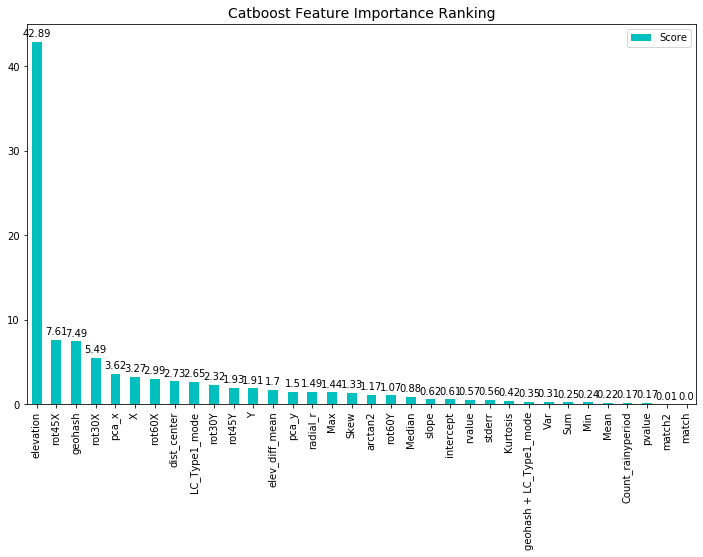

In [240]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

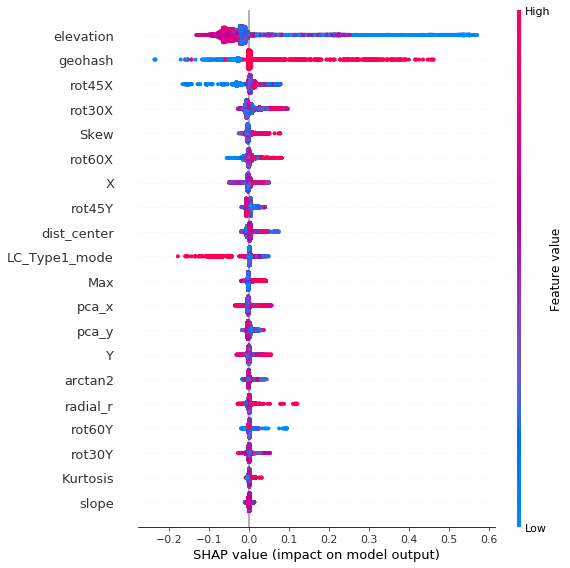

In [225]:
train_pool = Pool(target_encoded_train, y_trainfull)
import shap
shap_values = model.get_feature_importance(train_pool, fstr_type='ShapValues')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_pool)
shap.summary_plot(shap_values, target_encoded_train)

# Попробуем стекинг+блендинг линейных моделей с стандартизацией и нормализацией

In [56]:
# пишем функцию, которая вычисляет исходный скос и
# скос после выполненных преобразований
def diagnostics_skewness(df):
# создаем список переменных
    col_list = df.select_dtypes(include=['number']).columns
    skew_initial_list = []
    skew_pos_reciprocal_list = []
    skew_neg_reciprocal_list = []
    skew_log_list = []
    skew_corr_log_001_list = []
    skew_corr_log_01_list = []
    skew_corr_log_1_list = []
    skew_corr_log_5_list = []
    skew_cbrt_list = []
    skew_sqrt_list = []
    for i in col_list:
        a = 0.001
        df_ = df.copy()
        df_ = df_.fillna(df_[i].median())
        skew_initial = df_[i].skew()
        skew_pos_reciprocal = (1 / (df_[i].clip(0) + a)).skew()
        skew_neg_reciprocal = (-1 / (df_[i].clip(0) + a)).skew()
        skew_log = np.log(df_[i].clip(0) + a).skew()
        skew_corr_log_001 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.001).skew()  
        skew_corr_log_01 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.01).skew()
        skew_corr_log_1 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.1).skew()
        skew_corr_log_5 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.5).skew()
        skew_cbrt = np.cbrt(df_[i].abs()).skew()
        skew_sqrt = np.sqrt(df_[i].abs()).skew()
        skew_initial_list.append(skew_initial)
        skew_pos_reciprocal_list.append(skew_pos_reciprocal)
        skew_neg_reciprocal_list.append(skew_neg_reciprocal)
        skew_log_list.append(skew_log)
        skew_corr_log_001_list.append(skew_corr_log_001)
        skew_corr_log_01_list.append(skew_corr_log_01)
        skew_corr_log_1_list.append(skew_corr_log_1)
        skew_corr_log_5_list.append(skew_corr_log_5)
        skew_cbrt_list.append(skew_cbrt)
        skew_sqrt_list.append(skew_sqrt)
    result = pd.DataFrame({'Переменная': col_list,
                           'Skew_init': skew_initial_list,
                           'Skew_pos_recip': skew_pos_reciprocal_list,
                           'Skew_neg_recip': skew_neg_reciprocal_list,
                           'Skew_log': skew_log_list,
                           'Skew_adj_log (k=0.001)': skew_corr_log_001_list,
                           'Skew_adj_log (k=0.01)': skew_corr_log_01_list,
                           'Skew_adj_log (k=0.1)': skew_corr_log_1_list,
                           'Skew_adj_log (k=0.5)': skew_corr_log_5_list,
                           'Skew_cbrt': skew_cbrt_list,
                           'Skew_sqrt': skew_sqrt_list})
    result = np.round(result.sort_values(by='Skew_init', ascending=False), 3)
    cm = sns.light_palette('magenta', as_cmap=True)
    return result.style.background_gradient(cmap=cm)

In [73]:


 
Skew = diagnostics_skewness(X_trainfullsubm)
 
Skew.to_excel('D:\Python\Zindi\Flood\skew.xlsx')



In [63]:
# пишем функцию, которая вычисляет исходный скос и
# скос после выполненных преобразований
def diagnostics_kurt(df):
# создаем список переменных
    col_list = df.select_dtypes(include=['number']).columns
    kurt_initial_list = []
    kurt_pos_reciprocal_list = []
    kurt_neg_reciprocal_list = []
    kurt_log_list = []
    kurt_corr_log_001_list = []
    kurt_corr_log_01_list = []
    kurt_corr_log_1_list = []
    kurt_corr_log_5_list = []
    kurt_cbrt_list = []
    kurt_sqrt_list = []
    for i in col_list:
        a = 0.001
        df_ = df.copy()
        df_ = df_.fillna(df_[i].median())
        kurt_initial = df_[i].kurtosis()
        kurt_pos_reciprocal = (1 / (df_[i].clip(0) + a)).kurtosis()
        kurt_neg_reciprocal = (-1 / (df_[i].clip(0) + a)).kurtosis()
        kurt_log = np.log(df_[i].clip(0) + a).kurtosis()
        kurt_corr_log_001 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.001).kurtosis()  
        kurt_corr_log_01 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.01).kurtosis()
        kurt_corr_log_1 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.1).kurtosis()
        kurt_corr_log_5 = np.log(((df_[i].clip(0) + a) / df_[i].mean()) + 0.5).kurtosis()
        kurt_cbrt = np.cbrt(df_[i].abs()).kurtosis()
        kurt_sqrt = np.sqrt(df_[i].abs()).kurtosis()
        kurt_initial_list.append(kurt_initial)
        kurt_pos_reciprocal_list.append(kurt_pos_reciprocal)
        kurt_neg_reciprocal_list.append(kurt_neg_reciprocal)
        kurt_log_list.append(kurt_log)
        kurt_corr_log_001_list.append(kurt_corr_log_001)
        kurt_corr_log_01_list.append(kurt_corr_log_01)
        kurt_corr_log_1_list.append(kurt_corr_log_1)
        kurt_corr_log_5_list.append(kurt_corr_log_5)
        kurt_cbrt_list.append(kurt_cbrt)
        kurt_sqrt_list.append(kurt_sqrt)
    result = pd.DataFrame({'Переменная': col_list,
                           'kurt_init': kurt_initial_list,
                           'kurt_pos_recip': kurt_pos_reciprocal_list,
                           'kurt_neg_recip': kurt_neg_reciprocal_list,
                           'kurt_log': kurt_log_list,
                           'kurt_adj_log (k=0.001)': kurt_corr_log_001_list,
                           'kurt_adj_log (k=0.01)': kurt_corr_log_01_list,
                           'kurt_adj_log (k=0.1)': kurt_corr_log_1_list,
                           'kurt_adj_log (k=0.5)': kurt_corr_log_5_list,
                           'kurt_cbrt': kurt_cbrt_list,
                           'kurt_sqrt': kurt_sqrt_list})
    result = np.round(result.sort_values(by='kurt_init', ascending=False), 3)
    cm = sns.light_palette('magenta', as_cmap=True)
    return result.style.background_gradient(cmap=cm)

In [64]:
diagnostics_kurt(X_trainfullsubm)

,Переменная,kurt_init,kurt_pos_recip,kurt_neg_recip,kurt_log,kurt_adj_log (k=0.001),kurt_adj_log (k=0.01),kurt_adj_log (k=0.1),kurt_adj_log (k=0.5),kurt_cbrt,kurt_sqrt
10,Min,12.67,4.747,4.747,5.082,5.103,5.225,5.676,6.52,6.485,8.083
4,Mean,7.375,2.802,2.802,4.779,4.781,4.8,4.971,5.52,5.59,6.019
12,intercept,5.078,3.61,3.61,4.285,4.286,4.292,4.35,4.529,4.537,4.668
3,LC_Type1_mode,4.119,73.111,73.111,20.861,20.794,20.211,15.983,9.295,11.447,8.448
13,rvalue,3.991,13.555,13.555,6.087,5.934,5.061,3.013,1.433,4.753,3.016
2,elevation,3.347,6.385,6.385,0.678,0.668,0.586,0.127,-0.181,0.066,0.197
11,slope,2.772,10.857,10.857,4.63,4.585,4.249,2.853,1.4,4.37,2.699
7,Kurtosis,2.202,-0.022,-0.022,-0.396,-0.525,-0.848,-1.243,-1.029,-0.803,-0.309
5,Median,2.007,-0.77,-0.77,-0.133,-0.132,-0.122,-0.029,0.31,0.377,0.705
6,Skew,1.112,2.265,2.265,-0.272,-0.273,-0.278,-0.306,-0.208,-0.131,0.065


In [75]:
 
Kurt = diagnostics_kurt(X_trainfullsubm)
 
Kurt.to_excel('D:\Python\Zindi\Flood\kurt.xlsx')

In [79]:
from sklearn.preprocessing import PowerTransformer
# создаем модель экземпляр класса PowerTransformer
# и обучаем ее - вычисляем значения lambda


power = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_trainfullsubm)

In [80]:
print(power.lambdas_)

[-6.14035336  7.17767687  0.5599863   1.13988877 -3.44472823 -0.85116865
 -0.86707833  0.25643643 -0.7999662  -0.89306361 -7.72626945 13.07057849
 -7.22058369  7.09754484 -1.85503894  7.84903855  8.68189824  6.29167028
 -1.05502795 -8.31058188 -5.12265146  0.44923125  1.09286444 -6.99506157
  0.71641979  0.8741554   0.90917914  3.77986325 -6.40079636  6.09997948]


In [82]:
X_trainfullsubm_t = power.transform(X_trainfullsubm)
X_testfullsubm_t = power.transform(X_testfullsubm)

In [ ]:
#Kaggle House example

In [34]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [113]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
X=X_trainfullsubm
y=y_trainfull

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [115]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=7, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=15000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )



xgboost = XGBRegressor(n_estimators=3800, #3500
    max_depth=13,
    #min_child_weight = 10,
    learning_rate=0.005, #eta = 0.005,
    subsample=0.9, #0.9
    colsample_bytree=0.4,
    random_state=2019,
    objective='reg:linear',
    tree_method='gpu_hist'  #обучимся на видюшке - скорость огонь минуты против часов
)

catboost = CatBoostRegressor(
    eval_metric='RMSE',
    iterations=9000,  
    learning_rate=0.005, 
    depth = 9,
    random_seed=42,
    loss_function='RMSE',
    #random_strength= 0.1,
   # bagging_temperature=0.1,
    #l2_leaf_reg= 30, 
    use_best_model = True, 
    #logging_level='Silent'
    task_type="GPU"
)


# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

RF = RandomForestRegressor(max_depth=15, random_state=0)


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm, xgboost, catboost),
                                meta_regressor=RF,
                                use_features_in_secondary=True)


svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'Svd': svr,
          'xgboost': xgboost,
          'catboost': catboost,
         'RF' : RF}
predictions = {}
scores = {}

In [117]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

[20:26:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:57:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:00] WARNI

In [118]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

score = cv_rmse(xgboost)
print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(catboost)
print("catboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print('Svr')
svr_model_full_data = svr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print('catboost')
cat_model_full_data = catboost.fit(X, y)

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

---- Score with CV_RMSLE-----
Ridge score: 0.2128 (0.0067)

Lasso score: 0.2128 (0.0067)

ElasticNet score: 0.2129 (0.0067)

lightgbm score: 0.1051 (0.0025)

SVR: 0.2277 (0.0082)
[21:36:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [119]:
def blend_models_predict(X):
    return ((0.1  * elastic_model.predict(X)) + \
            (0.1 * lasso_model.predict(X)) + \
            (0.1 * ridge_model.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.03 * svr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.2 * cat_model_full_data.predict(X)) + \
            (0.27 * stack_gen_model.predict(np.array(X))))

In [120]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.1006752451149785


In [121]:
import numpy as np
sample_submission = pd.read_csv("D:\Python\Zindi\Flood\SampleSubmission.csv", sep=",", index_col='Square_ID')
sample_submission['target_2019'] = blend_models_predict(X_testfullsubm)
sample_submission.to_csv('D:\Python\Zindi\Flood\samplesubm22_xgboost.csv')

In [60]:
import time

# webdriver это и есть набор команд для управления браузером
from selenium import webdriver

# инициализируем драйвер браузера. После этой команды вы должны увидеть новое открытое окно браузера
driver = webdriver.Chrome('C:\chromedriver\chromedriver.exe')

# команда time.sleep устанавливает паузу в 5 секунд, чтобы мы успели увидеть, что происходит в браузере
time.sleep(5)

# Метод get сообщает браузеру, что нужно открыть сайт по указанной ссылке
driver.get("https://stepik.org/lesson/25969/step/12")
time.sleep(5)

# Метод find_element_by_css_selector позволяет найти нужный элемент на сайте, указав путь к нему. Способы поиска элементов мы обсудим позже
# Ищем поле для ввода текста
textarea = driver.find_element_by_css_selector(".textarea")

# Напишем текст ответа в найденное поле
textarea.send_keys("get()")
time.sleep(5)

# Найдем кнопку, которая отправляет введенное решение
submit_button = driver.find_element_by_css_selector(".submit-submission")

# Скажем драйверу, что нужно нажать на кнопку. После этой команды мы должны увидеть сообщение о правильном ответе
submit_button.click()
time.sleep(5)

# После выполнения всех действий мы не должны забыть закрыть окно браузера
driver.quit()


In [65]:
from haversine import haversine
point1 = (34.43, -15.79)

point2 = haversine((34.44, -15.8), point1)

In [350]:
target_encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16466 entries, 4e3c3896-14ce-11ea-bce5-f49634744a41 to 4e6f5e01-14ce-11ea-bce5-f49634744a41
Columns: 2117 entries, X to intercept_Var_sub
dtypes: float64(2098), int64(19)
memory usage: 266.1+ MB
